# import packages

In [15]:
library(data.table)
library(Seurat)
library(tidyverse)
library(ggplot2)
library(ggpubr)
library(ComplexHeatmap)
library(DT)

source('~/script/utils.r')
base_dir = '/research_jude/rgs01_jude/groups/jxugrp/home/common/Lab_Members/WenhuoHu/TE/HOXA/'
data_dir = '/research_jude/rgs01_jude/groups/jxugrp/home/common/Data_Public/RNA_seq/HOXA_HSC/'
setwd(base_dir)


In [3]:
dir.create(base_dir)
dir.create(data_dir)

# design table

In [ ]:
#https://www.ncbi.nlm.nih.gov/sra?linkname=bioproject_sra_all&from_uid=1074858

In [8]:
dsn = fread('Run,AGE,Assay Type,AvgSpotLen,Bases,BIOMATERIAL_PROVIDER,BioProject,BioSample,BioSampleModel,Bytes,cell_line,cell_type,Center Name,Collection_Date,Consent,DATASTORE filetype,DATASTORE provider,DATASTORE region,dev_stage,Experiment,geo_loc_name_country,geo_loc_name_country_continent,geo_loc_name,Instrument,isolate,Library Name,LibraryLayout,LibrarySelection,LibrarySource,Organism,Platform,ReleaseDate,create_date,version,Sample Name,SRA Study,tissue,Karyotype,sex
SRR27924418,Passage 35,RNA-Seq,300,6389514000,"Kyle Loh - 265 Campus Drive, Palo Alto, CA 94305",PRJNA1074858,SAMN39895168,Human,2201460378,WA01 Human ES,H1 Day 11 Hematopoietic Progenitors,STANFORD UNIVERSITY,2021-08-01,public,"fastq,run.zq,sra","gs,ncbi,s3","ncbi.public,s3.us-east-1,gs.us-east1",Day 11,SRX23581588,USA,North America,USA: California,Illumina NovaSeq 6000,WA01 Human ES,SI_AV_10,PAIRED,PCR,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2024-02-29T00:00:00Z,2024-02-08T21:42:00Z,1,SI_AV_10,SRP489050,Human ES Cell Line,Normal,male
SRR27924419,Passage 35,RNA-Seq,300,7413462300,"Kyle Loh - 265 Campus Drive, Palo Alto, CA 94305",PRJNA1074858,SAMN39895167,Human,2433343946,WA01 Human ES,H1 Day 10 Hematopoietic Progenitors (CD43- CD45-),STANFORD UNIVERSITY,2021-08-01,public,"run.zq,fastq,sra","ncbi,s3,gs","s3.us-east-1,ncbi.public,gs.us-east1",Day 10,SRX23581587,USA,North America,USA: California,Illumina NovaSeq 6000,WA01 Human ES,SI_AV_9,PAIRED,PCR,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2024-02-29T00:00:00Z,2024-02-08T21:38:00Z,1,SI_AV_9,SRP489050,Human ES Cell Line,Normal,male
SRR27924420,Passage 35,RNA-Seq,300,6419542800,"Kyle Loh - 265 Campus Drive, Palo Alto, CA 94305",PRJNA1074858,SAMN39895166,Human,2111537636,WA01 Human ES,H1 Day 10 Hematopoietic Progenitors (CD45+ CD144+),STANFORD UNIVERSITY,2021-08-01,public,"sra,run.zq,fastq","s3,ncbi,gs","ncbi.public,s3.us-east-1,gs.us-east1",Day 10,SRX23581586,USA,North America,USA: California,Illumina NovaSeq 6000,WA01 Human ES,SI_AV_8,PAIRED,PCR,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2024-02-29T00:00:00Z,2024-02-08T21:39:00Z,1,SI_AV_8,SRP489050,Human ES Cell Line,Normal,male
SRR27924421,Passage 35,RNA-Seq,300,32890096200,"Kyle Loh - 265 Campus Drive, Palo Alto, CA 94305",PRJNA1074858,SAMN39895165,Human,10787922579,WA01 Human ES,H1 Day 10 Hematopoietic Progenitors,STANFORD UNIVERSITY,2021-08-01,public,"run.zq,fastq,sra","ncbi,gs,s3","gs.us-east1,s3.us-east-1,ncbi.public",Day 10,SRX23581585,USA,North America,USA: California,Illumina NovaSeq 6000,WA01 Human ES,SI_AV_7,PAIRED,PCR,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2024-02-29T00:00:00Z,2024-02-08T22:17:00Z,1,SI_AV_7,SRP489050,Human ES Cell Line,Normal,male
SRR27924422,Passage 35,RNA-Seq,300,6493813800,"Kyle Loh - 265 Campus Drive, Palo Alto, CA 94305",PRJNA1074858,SAMN39895164,Human,2229846540,WA01 Human ES,H1 Day 7 Hemogenic Endothelium,STANFORD UNIVERSITY,2021-08-01,public,"fastq,sra,run.zq","gs,s3,ncbi","ncbi.public,s3.us-east-1,gs.us-east1",Day 7,SRX23581584,USA,North America,USA: California,Illumina NovaSeq 6000,WA01 Human ES,SI_AV_6,PAIRED,PCR,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2024-02-29T00:00:00Z,2024-02-08T21:42:00Z,1,SI_AV_6,SRP489050,Human ES Cell Line,Normal,male
SRR27924423,Passage 35,RNA-Seq,300,7758407700,"Kyle Loh - 265 Campus Drive, Palo Alto, CA 94305",PRJNA1074858,SAMN39895163,Human,2635445589,WA01 Human ES,H1 Day 4 Arterial Endothelial Cells,STANFORD UNIVERSITY,2021-08-01,public,"sra,run.zq,fastq","gs,s3,ncbi","ncbi.public,s3.us-east-1,gs.us-east1",Day 4,SRX23581583,USA,North America,USA: California,Illumina NovaSeq 6000,WA01 Human ES,SI_AV_5,PAIRED,PCR,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2024-02-29T00:00:00Z,2024-02-08T21:43:00Z,1,SI_AV_5,SRP489050,Human ES Cell Line,Normal,male
SRR27924424,Post-natal,RNA-Seq,300,9254790300,"Kyle Loh - 265 Campus Drive, Palo Alto, CA 94305",PRJNA1074858,SAMN39895190,Human,3020882073,Primary Cells,Rep 2 Cord Blood Progenitors (CD34+ CD90- CD38+),STANFORD UNIVERSITY,2021-08-01,public,"run.zq,fastq,sra","ncbi,gs,s3","s3.us-east-1,gs.us-east1,ncbi.public",Post-natal,SRX23581582,USA,North America,USA: California,Illumina NovaSeq 6000,Mixed Donor CD34+ Cord Blood,SI_AV_32,PAIRED,PCR,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2024-02-29T00:00:00Z,2024-02-08T21:45:00Z,1,SI_AV_32,SRP489050,Umbilical Cord,,
SRR27924425,Post-natal,RNA-Seq,300,6649084800,"Kyle Loh - 265 Campus Drive, Palo Alto, CA 94305",PRJNA1074858,SAMN39895189,Human,2192355360,Primary Cells,Rep 2 Cord Blood MPPs (CD34+ CD90- CD38-),STANFORD UNIVERSITY,2021-08-01,public,"run.zq,fastq,sra","gs,s3,ncbi","gs.us-east1,ncbi.public,s3.us-east-1",Post-natal,SRX23581581,USA,North America,USA: California,Illumina NovaSeq 6000,Mixed Donor CD34+ Cord Blood,SI_AV_31,PAIRED,PCR,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2024-02-29T00:00:00Z,2024-02-08T21:42:00Z,1,SI_AV_31,SRP489050,Umbilical Cord,,
SRR27924426,Passage 35,RNA-Seq,300,7953534600,"Kyle Loh - 265 Campus Drive, Palo Alto, CA 94305",PRJNA1074858,SAMN39895162,Human,2609849203,WA01 Human ES,H1 Day 3 Lateral Mesoderm,STANFORD UNIVERSITY,2021-08-01,public,"run.zq,sra,fastq","s3,ncbi,gs","ncbi.public,gs.us-east1,s3.us-east-1",Day 3,SRX23581580,USA,North America,USA: California,Illumina NovaSeq 6000,WA01 Human ES,SI_AV_4,PAIRED,PCR,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2024-02-29T00:00:00Z,2024-02-08T21:43:00Z,1,SI_AV_4,SRP489050,Human ES Cell Line,Normal,male
SRR27924427,Post-natal,RNA-Seq,300,7692763200,"Kyle Loh - 265 Campus Drive, Palo Alto, CA 94305",PRJNA1074858,SAMN39895188,Human,2532601418,Primary Cells,Rep 2 Cord Blood HSCs (CD34+ CD90+ CD38- CD45RA-),STANFORD UNIVERSITY,2021-08-01,public,"run.zq,fastq,sra","ncbi,s3,gs","ncbi.public,s3.us-east-1,gs.us-east1",Post-natal,SRX23581579,USA,North America,USA: California,Illumina NovaSeq 6000,Mixed Donor CD34+ Cord Blood,SI_AV_30,PAIRED,PCR,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2024-02-29T00:00:00Z,2024-02-08T21:44:00Z,1,SI_AV_30,SRP489050,Umbilical Cord,,
SRR27924428,Post-natal,RNA-Seq,300,7607715600,"Kyle Loh - 265 Campus Drive, Palo Alto, CA 94305",PRJNA1074858,SAMN39895187,Human,2529702494,Primary Cells,Rep 2 Cord Blood HSPCs (CD34+),STANFORD UNIVERSITY,2021-08-01,public,"fastq,sra,run.zq","s3,gs,ncbi","ncbi.public,gs.us-east1,s3.us-east-1",Post-natal,SRX23581578,USA,North America,USA: California,Illumina NovaSeq 6000,Mixed Donor CD34+ Cord Blood,SI_AV_29,PAIRED,PCR,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2024-02-29T00:00:00Z,2024-02-08T21:43:00Z,1,SI_AV_29,SRP489050,Umbilical Cord,,
SRR27924429,Post-natal,RNA-Seq,300,9005547300,"Kyle Loh - 265 Campus Drive, Palo Alto, CA 94305",PRJNA1074858,SAMN39895186,Human,3018399849,Primary Cells,Rep 1 Cord Blood Progenitors (CD34+ CD90- CD38+),STANFORD UNIVERSITY,2021-08-01,public,"sra,fastq,run.zq","ncbi,s3,gs","ncbi.public,s3.us-east-1,gs.us-east1",Post-natal,SRX23581577,USA,North America,USA: California,Illumina NovaSeq 6000,Mixed Donor CD34+ Cord Blood,SI_AV_28,PAIRED,PCR,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2024-02-29T00:00:00Z,2024-02-08T21:45:00Z,1,SI_AV_28,SRP489050,Umbilical Cord,,
SRR27924430,Post-natal,RNA-Seq,300,5967370200,"Kyle Loh - 265 Campus Drive, Palo Alto, CA 94305",PRJNA1074858,SAMN39895185,Human,1960590341,Primary Cells,Rep 1 Cord Blood MPPs (CD34+ CD90- CD38-),STANFORD UNIVERSITY,2021-08-01,public,"run.zq,sra,fastq","ncbi,s3,gs","gs.us-east1,ncbi.public,s3.us-east-1",Post-natal,SRX23581576,USA,North America,USA: California,Illumina NovaSeq 6000,Mixed Donor CD34+ Cord Blood,SI_AV_27,PAIRED,PCR,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2024-02-29T00:00:00Z,2024-02-08T21:42:00Z,1,SI_AV_27,SRP489050,Umbilical Cord,,
SRR27924431,Post-natal,RNA-Seq,300,7680532500,"Kyle Loh - 265 Campus Drive, Palo Alto, CA 94305",PRJNA1074858,SAMN39895184,Human,2505868289,Primary Cells,Rep 1 Cord Blood HSCs (CD34+ CD90+ CD38- CD45RA-),STANFORD UNIVERSITY,2021-08-01,public,"run.zq,sra,fastq","gs,s3,ncbi","gs.us-east1,ncbi.public,s3.us-east-1",Post-natal,SRX23581575,USA,North America,USA: California,Illumina NovaSeq 6000,Mixed Donor CD34+ Cord Blood,SI_AV_26,PAIRED,PCR,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2024-02-29T00:00:00Z,2024-02-08T21:43:00Z,1,SI_AV_26,SRP489050,Umbilical Cord,,
SRR27924432,Post-natal,RNA-Seq,300,8351867700,"Kyle Loh - 265 Campus Drive, Palo Alto, CA 94305",PRJNA1074858,SAMN39895183,Human,2708766412,Primary Cells,Rep 1 Cord Blood HSPCs (CD34+),STANFORD UNIVERSITY,2021-08-01,public,"fastq,run.zq,sra","gs,s3,ncbi","gs.us-east1,s3.us-east-1,ncbi.public",Post-natal,SRX23581574,USA,North America,USA: California,Illumina NovaSeq 6000,Mixed Donor CD34+ Cord Blood,SI_AV_25,PAIRED,PCR,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2024-02-29T00:00:00Z,2024-02-08T21:44:00Z,1,SI_AV_25,SRP489050,Umbilical Cord,,
SRR27924433,Passage 40,RNA-Seq,300,6695905800,"Kyle Loh - 265 Campus Drive, Palo Alto, CA 94305",PRJNA1074858,SAMN39895175,Human,2182362454,WA07 Human ES,H7 Day 4 Arterial Endothelial Cells,STANFORD UNIVERSITY,2021-08-01,public,"sra,fastq,run.zq","gs,s3,ncbi","s3.us-east-1,gs.us-east1,ncbi.public",Day 4,SRX23581573,USA,North America,USA: California,Illumina NovaSeq 6000,WA07 Human ES,SI_AV_17,PAIRED,PCR,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2024-02-29T00:00:00Z,2024-02-08T21:42:00Z,1,SI_AV_17,SRP489050,Human ES Cell Line,Normal,female
SRR27924434,Passage 40,RNA-Seq,300,6791942400,"Kyle Loh - 265 Campus Drive, Palo Alto, CA 94305",PRJNA1074858,SAMN39895174,Human,2326335069,WA07 Human ES,H7 Day 3 Lateral Mesoderm,STANFORD UNIVERSITY,2021-08-01,public,"run.zq,fastq,sra","ncbi,gs,s3","s3.us-east-1,gs.us-east1,ncbi.public",Day 3,SRX23581572,USA,North America,USA: California,Illumina NovaSeq 6000,WA07 Human ES,SI_AV_16,PAIRED,PCR,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2024-02-29T00:00:00Z,2024-02-08T21:43:00Z,1,SI_AV_16,SRP489050,Human ES Cell Line,Normal,female
SRR27924435,Passage 40,RNA-Seq,300,6372155700,"Kyle Loh - 265 Campus Drive, Palo Alto, CA 94305",PRJNA1074858,SAMN39895173,Human,2102487019,WA07 Human ES,H7 Day 2 Posterior Primitive Streak,STANFORD UNIVERSITY,2021-08-01,public,"sra,fastq,run.zq","s3,gs,ncbi","ncbi.public,gs.us-east1,s3.us-east-1",Day 2,SRX23581571,USA,North America,USA: California,Illumina NovaSeq 6000,WA07 Human ES,SI_AV_15,PAIRED,PCR,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2024-02-29T00:00:00Z,2024-02-08T21:42:00Z,1,SI_AV_15,SRP489050,Human ES Cell Line,Normal,female
SRR27924436,Passage 40,RNA-Seq,300,5981954100,"Kyle Loh - 265 Campus Drive, Palo Alto, CA 94305",PRJNA1074858,SAMN39895172,Human,2028103249,WA07 Human ES,H7 Day 1 Posterior Primitive Streak,STANFORD UNIVERSITY,2021-08-01,public,"fastq,sra,run.zq","ncbi,s3,gs","ncbi.public,gs.us-east1,s3.us-east-1",Day 1,SRX23581570,USA,North America,USA: California,Illumina NovaSeq 6000,WA07 Human ES,SI_AV_14,PAIRED,PCR,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2024-02-29T00:00:00Z,2024-02-08T21:43:00Z,1,SI_AV_14,SRP489050,Human ES Cell Line,Normal,female
SRR27924437,Passage 40,RNA-Seq,300,6194496300,"Kyle Loh - 265 Campus Drive, Palo Alto, CA 94305",PRJNA1074858,SAMN39895171,Human,2020110975,WA07 Human ES,H7 Day 0 hPSCs,STANFORD UNIVERSITY,2021-08-01,public,"sra,fastq,run.zq","ncbi,gs,s3","ncbi.public,gs.us-east1,s3.us-east-1",Day 0,SRX23581569,USA,North America,USA: California,Illumina NovaSeq 6000,WA07 Human ES,SI_AV_13,PAIRED,PCR,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2024-02-29T00:00:00Z,2024-02-08T21:42:00Z,1,SI_AV_13,SRP489050,Human ES Cell Line,Normal,female
SRR27924438,Passage 35,RNA-Seq,300,7182020700,"Kyle Loh - 265 Campus Drive, Palo Alto, CA 94305",PRJNA1074858,SAMN39895170,Human,2364557044,WA01 Human ES,H1 Day 15 Hematopoietic Progenitors,STANFORD UNIVERSITY,2021-08-01,public,"run.zq,fastq,sra","ncbi,gs,s3","s3.us-east-1,gs.us-east1,ncbi.public",Day 15,SRX23581568,USA,North America,USA: California,Illumina NovaSeq 6000,WA01 Human ES,SI_AV_12,PAIRED,PCR,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2024-02-29T00:00:00Z,2024-02-08T21:43:00Z,1,SI_AV_12,SRP489050,Human ES Cell Line,Normal,male
SRR27924439,Passage 35,RNA-Seq,300,6136536000,"Kyle Loh - 265 Campus Drive, Palo Alto, CA 94305",PRJNA1074858,SAMN39895169,Human,2025133755,WA01 Human ES,H1 Day 13 Hematopoietic Progenitors,STANFORD UNIVERSITY,2021-08-01,public,"fastq,run.zq,sra","ncbi,s3,gs","s3.us-east-1,gs.us-east1,ncbi.public",Day 13,SRX23581567,USA,North America,USA: California,Illumina NovaSeq 6000,WA01 Human ES,SI_AV_11,PAIRED,PCR,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2024-02-29T00:00:00Z,2024-02-08T21:42:00Z,1,SI_AV_11,SRP489050,Human ES Cell Line,Normal,male
SRR27924440,Passage 35,RNA-Seq,300,9943555200,"Kyle Loh - 265 Campus Drive, Palo Alto, CA 94305",PRJNA1074858,SAMN39895160,Human,3383165026,WA01 Human ES,H1 Day 1 Posterior Primitive Streak,STANFORD UNIVERSITY,2021-08-01,public,"fastq,sra,run.zq","gs,ncbi,s3","gs.us-east1,ncbi.public,s3.us-east-1",Day 1,SRX23581566,USA,North America,USA: California,Illumina NovaSeq 6000,WA01 Human ES,SI_AV_2,PAIRED,PCR,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2024-02-29T00:00:00Z,2024-02-08T21:47:00Z,1,SI_AV_2,SRP489050,Human ES Cell Line,Normal,male
SRR27924441,Passage 35,RNA-Seq,300,7372037100,"Kyle Loh - 265 Campus Drive, Palo Alto, CA 94305",PRJNA1074858,SAMN39895159,Human,2440694616,WA01 Human ES,H1 Day 0 hPSCs,STANFORD UNIVERSITY,2021-08-01,public,"run.zq,sra,fastq","gs,s3,ncbi","s3.us-east-1,ncbi.public,gs.us-east1",Day 0,SRX23581565,USA,North America,USA: California,Illumina NovaSeq 6000,WA01 Human ES,SI_AV_1,PAIRED,PCR,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2024-02-29T00:00:00Z,2024-02-08T21:43:00Z,1,SI_AV_1,SRP489050,Human ES Cell Line,Normal,male
SRR27924442,Passage 40,RNA-Seq,300,6917772300,"Kyle Loh - 265 Campus Drive, Palo Alto, CA 94305",PRJNA1074858,SAMN39895182,Human,2286557528,WA07 Human ES,H7 Day 15 Hematopoietic Progenitors,STANFORD UNIVERSITY,2021-08-01,public,"fastq,run.zq,sra","ncbi,s3,gs","ncbi.public,gs.us-east1,s3.us-east-1",Day 15,SRX23581564,USA,North America,USA: California,Illumina NovaSeq 6000,WA07 Human ES,SI_AV_24,PAIRED,PCR,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2024-02-29T00:00:00Z,2024-02-08T21:42:00Z,1,SI_AV_24,SRP489050,Human ES Cell Line,Normal,female
SRR27924443,Passage 40,RNA-Seq,300,6335666100,"Kyle Loh - 265 Campus Drive, Palo Alto, CA 94305",PRJNA1074858,SAMN39895181,Human,2076407894,WA07 Human ES,H7 Day 13 Hematopoietic Progenitors,STANFORD UNIVERSITY,2021-08-01,public,"fastq,run.zq,sra","s3,gs,ncbi","ncbi.public,s3.us-east-1,gs.us-east1",Day 13,SRX23581563,USA,North America,USA: California,Illumina NovaSeq 6000,WA07 Human ES,SI_AV_23,PAIRED,PCR,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2024-02-29T00:00:00Z,2024-02-08T21:42:00Z,1,SI_AV_23,SRP489050,Human ES Cell Line,Normal,female
SRR27924444,Passage 40,RNA-Seq,300,7019006700,"Kyle Loh - 265 Campus Drive, Palo Alto, CA 94305",PRJNA1074858,SAMN39895180,Human,2479566483,WA07 Human ES,H7 Day 11 Hematopoietic Progenitors,STANFORD UNIVERSITY,2021-08-01,public,"sra,fastq,run.zq","ncbi,gs,s3","s3.us-east-1,gs.us-east1,ncbi.public",Day 11,SRX23581562,USA,North America,USA: California,Illumina NovaSeq 6000,WA07 Human ES,SI_AV_22,PAIRED,PCR,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2024-02-29T00:00:00Z,2024-02-08T21:44:00Z,1,SI_AV_22,SRP489050,Human ES Cell Line,Normal,female
SRR27924445,Passage 40,RNA-Seq,300,6501777000,"Kyle Loh - 265 Campus Drive, Palo Alto, CA 94305",PRJNA1074858,SAMN39895179,Human,2128668451,WA07 Human ES,H7 Day 10 Hematopoietic Progenitors (CD43- CD45-),STANFORD UNIVERSITY,2021-08-01,public,"run.zq,sra,fastq","gs,ncbi,s3","s3.us-east-1,gs.us-east1,ncbi.public",Day 10,SRX23581561,USA,North America,USA: California,Illumina NovaSeq 6000,WA07 Human ES,SI_AV_21,PAIRED,PCR,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2024-02-29T00:00:00Z,2024-02-08T21:42:00Z,1,SI_AV_21,SRP489050,Human ES Cell Line,Normal,female
SRR27924446,Passage 35,RNA-Seq,300,8527235100,"Kyle Loh - 265 Campus Drive, Palo Alto, CA 94305",PRJNA1074858,SAMN39895161,Human,2823634729,WA01 Human ES,H1 Day 2 Posterior Primitive Streak,STANFORD UNIVERSITY,2021-08-01,public,"fastq,sra,run.zq","s3,ncbi,gs","ncbi.public,gs.us-east1,s3.us-east-1",Day 2,SRX23581560,USA,North America,USA: California,Illumina NovaSeq 6000,WA01 Human ES,SI_AV_3,PAIRED,PCR,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2024-02-29T00:00:00Z,2024-02-08T21:44:00Z,1,SI_AV_3,SRP489050,Human ES Cell Line,Normal,male
SRR27924447,Passage 40,RNA-Seq,300,7662593700,"Kyle Loh - 265 Campus Drive, Palo Alto, CA 94305",PRJNA1074858,SAMN39895178,Human,2512648726,WA07 Human ES,H7 Day 10 Hematopoietic Progenitors (CD45+ CD144+),STANFORD UNIVERSITY,2021-08-01,public,"fastq,run.zq,sra","gs,s3,ncbi","gs.us-east1,ncbi.public,s3.us-east-1",Day 10,SRX23581559,USA,North America,USA: California,Illumina NovaSeq 6000,WA07 Human ES,SI_AV_20,PAIRED,PCR,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2024-02-29T00:00:00Z,2024-02-08T21:43:00Z,1,SI_AV_20,SRP489050,Human ES Cell Line,Normal,female
SRR27924448,Passage 40,RNA-Seq,300,6608325900,"Kyle Loh - 265 Campus Drive, Palo Alto, CA 94305",PRJNA1074858,SAMN39895177,Human,2162425257,WA07 Human ES,H7 Day 10 Hematopoietic Progenitors,STANFORD UNIVERSITY,2021-08-01,public,"sra,run.zq,fastq","gs,ncbi,s3","gs.us-east1,s3.us-east-1,ncbi.public",Day 10,SRX23581558,USA,North America,USA: California,Illumina NovaSeq 6000,WA07 Human ES,SI_AV_19,PAIRED,PCR,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2024-02-29T00:00:00Z,2024-02-08T21:42:00Z,1,SI_AV_19,SRP489050,Human ES Cell Line,Normal,female
SRR27924449,Passage 40,RNA-Seq,300,6921000900,"Kyle Loh - 265 Campus Drive, Palo Alto, CA 94305",PRJNA1074858,SAMN39895176,Human,2462416298,WA07 Human ES,H7 Day 7 Hemogenic Endothelium,STANFORD UNIVERSITY,2021-08-01,public,"fastq,run.zq,sra","ncbi,s3,gs","gs.us-east1,s3.us-east-1,ncbi.public",Day 7,SRX23581557,USA,North America,USA: California,Illumina NovaSeq 6000,WA07 Human ES,SI_AV_18,PAIRED,PCR,TRANSCRIPTOMIC,Homo sapiens,ILLUMINA,2024-02-29T00:00:00Z,2024-02-08T21:44:00Z,1,SI_AV_18,SRP489050,Human ES Cell Line,Normal,female
', header = T, sep = ',')

In [17]:
setnames(dsn, 'Run', 'srr_id')
dsn[, sample_name := srr_id]

In [18]:
fwrite(dsn, file = 'dsn.tsv')

In [58]:
datatable(dsn)

HTML widgets cannot be represented in plain text (need html)

# fastq download

In [19]:
dsn[, sample_dir := paste0(base_dir, 'data/', srr_id, '/')]
dsn[, fastq_dir := paste0(data_dir, srr_id, '/')]


In [ ]:
inv = dsn[, {dir.create(.SD$sample_dir, recursive = T)}, by = 1:nrow(dsn) ]
inv = dsn[, {dir.create(.SD$fastq_dir, recursive = T)}, by = 1:nrow(dsn) ]


In [23]:
bin_exe = '~/repos/sratoolkit.3.1.1-centos_linux64/bin/'


In [41]:
dsn[, prefetch_cmd := paste0(bin_exe, 'prefetch ',     srr_id, ' -O ', fastq_dir, ' --max-size 100g')]
dsn[, fastqdump_cmd:= paste0(bin_exe, 'fasterq-dump -F --split-3 ', fastq_dir, '/', srr_id, ' -O ', fastq_dir, ' -e 20 ')]

dsn[, dump_r1 := paste0(fastq_dir, '/', srr_id, '_1.fastq')]
dsn[, dump_r2 := paste0(fastq_dir, '/', srr_id, '_2.fastq')]

dsn[, r1 := paste0(fastq_dir, '/', srr_id, '_1.fastq.gz')]
dsn[, r2 := paste0(fastq_dir, '/', srr_id, '_2.fastq.gz')]


dsn[, gz_r1_cmd := paste0(' gzip ', dump_r1 )]
dsn[, gz_r2_cmd := paste0(' gzip ', dump_r2 )]


In [40]:
write(dsn[, prefetch_cmd ],  file = 'hoxa_prefetch.sh')
write(dsn[, fastqdump_cmd ], file = 'hoxa_fastqdump.sh')


In [39]:
write(dsn[, gz_r1_cmd ], file = 'gzip.sh')
write(dsn[, gz_r2_cmd ], file = 'gzip.sh', append = T)


In [30]:
dsn[, sra_file := paste0(fastq_dir, '/', srr_id, '/', srr_id, '.sra')]
dsn[1, sra_file]


[1] "/research_jude/rgs01_jude/groups/jxugrp/home/common/Data_Public/RNA_seq/HOXA_HSC/SRR27924418//SRR27924418/SRR27924418.sra"

In [45]:
dsn[, sra_file := paste0(sample_raw_dir, srr_id, '/', srr_id, '.sra') ] 
all(file.exists(dsn[, sra_file]))


[1] "/research_jude/rgs01_jude/groups/jxugrp/home/common/Data_Public/scRNA_seq/GSE232710/GSM7372181/SRR24631487/SRR24631487.sra"

In [93]:
dsn[, r1 := paste0(fastq_dir, srr_id, '.fastq.gz') ]


In [94]:
sum(file.exists(dsn$r1))

[1] 376

In [85]:
dsn[, sample_pre := paste0(sample_dir, gsm_id)]
PP = 'iPSC'

In [86]:
t2t_cellranger_ref = '/home/whu78/WenhuoHu/genomes/t2t/t2t_cellranger'
#REFERENCE_GENOME="/research/groups/jxugrp/home/common/Lab_Members/SyedAhmad/Projects_Main_Farhan/trimmed_copy_leukemia_samples/testig_new_T2T_GTF"
#REFERENCE_GENOME_FASTA='/research/groups/jxugrp/home/common/Lab_Members/SyedAhmad/Projects_Main_Farhan/trimmed_copy_leukemia_samples/testig_new_T2T_GTF/hs1.fa'
#GTF_FILE="/research/groups/jxugrp/home/common/Lab_Members/SyedAhmad/Projects_Main_Farhan/trimmed_copy_leukemia_samples/testig_new_T2T_GTF/hs1.ncbiRefSeq.gtf"
#TE_GTF_FILE="/research/groups/jxugrp/home/common/Lab_Members/SyedAhmad/Projects_Main_Farhan/trimmed_copy_leukemia_samples/testig_new_T2T_GTF/T2T_CHM13_v2_rmsk_TE.gtf"
cellranger_exe = '/research_jude/rgs01_jude/groups/jxugrp/home/common/Lab_Members/WenhuoHu/repos/cellranger-8.0.1/bin/cellranger' 

dsn[, cranger_jobname := paste0('cranger_', gsm_id)]
dsn[, cranger_oo := paste0(sample_pre, 'cranger_out')]
dsn[, cranger_eo := paste0(sample_pre, 'cranger_err')]

#dsn[, bam_prefix := paste0(sample_pre, '_')]
#dsn[, bam_file := paste0(bam_prefix, 'Aligned.sortedByCoord.out.bam')]
#alignments/A549_0_1 Aligned.sortedByCoord.out.bam

dsn[, cranger_cmd := paste0('bsub -J ', cranger_jobname, ' -o ', cranger_oo, ' -e ', cranger_eo, ' -P ', PP, ' -n 30 -R "rusage[mem=5GB]" ')]
dsn[, cranger_cmd := paste0(cranger_cmd, ' -R "span[hosts=1]" -W 290:00 ')]
dsn[, cranger_cmd := paste0(cranger_cmd, ' " ', cellranger_exe, ' count --fastqs ', fastq_dir)] 
dsn[, cranger_cmd := paste0(cranger_cmd, ' --output-dir ', sample_run_dir, ' --sample ', srr_id)] 
dsn[, cranger_cmd := paste0(cranger_cmd, ' --id ', gsm_id, ' --create-bam true --localcores 10 --localmem 100 ') ]
dsn[, cranger_cmd := paste0(cranger_cmd, ' --transcriptome ', t2t_cellranger_ref, ' "')] 

write(dsn[, cranger_cmd], file = paste0(base_dir, 'run_cranger.sh'))
dsn[1, cranger_cmd]

[1] "bsub -J cranger_GSM7372181 -o /research_jude/rgs01_jude/groups/jxugrp/home/common/Lab_Members/WenhuoHu/TE/iPSC/data/GSM7372181/GSM7372181cranger_out -e /research_jude/rgs01_jude/groups/jxugrp/home/common/Lab_Members/WenhuoHu/TE/iPSC/data/GSM7372181/GSM7372181cranger_err -P iPSC -n 30 -R \"rusage[mem=5GB]\"  -R \"span[hosts=1]\" -W 290:00  \" /research_jude/rgs01_jude/groups/jxugrp/home/common/Lab_Members/WenhuoHu/repos/cellranger-8.0.1/bin/cellranger count --fastqs /research_jude/rgs01_jude/groups/jxugrp/home/common/Data_Public/scRNA_seq/GSE232710/GSM7372181_SRR24631487/ --output-dir /research_jude/rgs01_jude/groups/jxugrp/home/common/Lab_Members/WenhuoHu/TE/iPSC/data/GSM7372181/ --id GSM7372181 --create-bam true  --transcriptome /home/whu78/WenhuoHu/genomes/t2t/t2t_cellranger \""

# STAR align

In [43]:
PP = 'HOX'

In [46]:
# module load star/2.7.10a
# star/2.7.4
REFERENCE_GENOME="/research/groups/jxugrp/home/common/Lab_Members/SyedAhmad/Projects_Main_Farhan/trimmed_copy_leukemia_samples/testig_new_T2T_GTF"
# star/2.7.1a
REFERENCE_GENOME="/research_jude/rgs01_jude/groups/jxugrp/home/common/Lab_Members/WenhuoHu/genomes/t2t/t2t/star"
REFERENCE_GENOME_FASTA='/research/groups/jxugrp/home/common/Lab_Members/SyedAhmad/Projects_Main_Farhan/trimmed_copy_leukemia_samples/testig_new_T2T_GTF/hs1.fa'
TE_GTF_FILE="/research/groups/jxugrp/home/common/Data_Public/RNA_seq/Demthylation_therapy_AML_cell_lines_RNA-seq_Khawanky_etal_Nature_communicat_GSE184891/trimmed_fastq/STAR_normal_mapped_t2t/TE_locus_analysis"

dsn[, star_jobname := paste0('star_', srr_id)]
dsn[, star_oo := paste0(sample_dir, 'star_', srr_id, '_out')]
dsn[, star_eo := paste0(sample_dir, 'star_', srr_id, '_err')]
dsn[, bam_prefix := paste0(sample_dir, srr_id, '_')]
dsn[, bam_file := paste0(bam_prefix, 'Aligned.sortedByCoord.out.bam')]

dsn[, star_cmd := paste0('bsub -J ', star_jobname, ' -o ', star_oo, ' -e ', star_eo, ' -P ', PP, ' -n 30 -R "rusage[mem=5GB]" ')]
dsn[, star_cmd := paste0(star_cmd, ' -R "span[hosts=1]" -W 290:00 ')]
dsn[, star_cmd := paste0(star_cmd, ' " STAR --genomeDir ', REFERENCE_GENOME)] 
dsn[, star_cmd := paste0(star_cmd, ' --runThreadN 28 --outSAMtype BAM SortedByCoordinate --outFilterMultimapNmax 1000 --outSAMmultNmax 1 ')]
dsn[, star_cmd := paste0(star_cmd, ' --outFilterMismatchNmax 3 --outMultimapperOrder Random --winAnchorMultimapNmax 1000 --alignEndsType EndToEnd ')]
dsn[, star_cmd := paste0(star_cmd, ' --alignIntronMax 1 --alignMatesGapMax 350 --quantMode TranscriptomeSAM --readFilesIn ', r1, ' ', r2)]
dsn[, star_cmd := paste0(star_cmd, ' --readFilesCommand zcat --outFileNamePrefix ', bam_prefix, '"')]

write(dsn[, star_cmd], file = paste0(base_dir, 'run_star.sh'))
dsn[1, star_cmd]


[1] "bsub -J star_SRR27924418 -o /research_jude/rgs01_jude/groups/jxugrp/home/common/Lab_Members/WenhuoHu/TE/HOXA/data/SRR27924418/star_SRR27924418_out -e /research_jude/rgs01_jude/groups/jxugrp/home/common/Lab_Members/WenhuoHu/TE/HOXA/data/SRR27924418/star_SRR27924418_err -P HOX -n 30 -R \"rusage[mem=5GB]\"  -R \"span[hosts=1]\" -W 290:00  \" STAR --genomeDir /research_jude/rgs01_jude/groups/jxugrp/home/common/Lab_Members/WenhuoHu/genomes/t2t/t2t/star --runThreadN 28 --outSAMtype BAM SortedByCoordinate --outFilterMultimapNmax 1000 --outSAMmultNmax 1  --outFilterMismatchNmax 3 --outMultimapperOrder Random --winAnchorMultimapNmax 1000 --alignEndsType EndToEnd  --alignIntronMax 1 --alignMatesGapMax 350 --quantMode TranscriptomeSAM --readFilesIn /research_jude/rgs01_jude/groups/jxugrp/home/common/Data_Public/RNA_seq/HOXA_HSC/SRR27924418//SRR27924418_1.fastq.gz /research_jude/rgs01_jude/groups/jxugrp/home/common/Data_Public/RNA_seq/HOXA_HSC/SRR27924418//SRR27924418_2.fastq.gz --readFilesCommand zcat --outFileNamePrefix /research_jude/rgs01_jude/groups/jxugrp/home/common/Lab_Members/WenhuoHu/TE/HOXA/data/SRR27924418/SRR27924418_\""

In [47]:
file.exists(dsn$bam_file)

[1] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[16] TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE TRUE
[31] TRUE TRUE

# TEcount

In [48]:
GTF_FILE="/research/groups/jxugrp/home/common/Lab_Members/SyedAhmad/Projects_Main_Farhan/trimmed_copy_leukemia_samples/testig_new_T2T_GTF/hs1.ncbiRefSeq.gtf"
TE_GTF_FILE="/research/groups/jxugrp/home/common/Lab_Members/SyedAhmad/Projects_Main_Farhan/trimmed_copy_leukemia_samples/testig_new_T2T_GTF/T2T_CHM13_v2_rmsk_TE.gtf"
bin_tecount = '/home/whu78/conda3/envs/te/bin/'

dsn[, tecount_jobname := paste0('tecount_', sample_name)]
dsn[, tecount_oo := paste0(sample_dir, 'tecount_', sample_name, '_out')]
dsn[, tecount_eo := paste0(sample_dir, 'tecount_', sample_name, '_err')]

dsn[, tecount_cmd := paste0('bsub -J ', tecount_jobname, ' -n 10 -o ', tecount_oo, ' -e ', tecount_eo, ' -P ', PP, ' -R "rusage[mem=5GB]" ')]
dsn[, tecount_cmd := paste0(tecount_cmd, ' -R "span[hosts=1]" -W 290:00 ')]
dsn[, tecount_cmd := paste0(tecount_cmd, ' " cd ', sample_dir, ' && ', bin_tecount, 'TEcount --sortByPos --format BAM --mode multi -b ', bam_file)] 
dsn[, tecount_cmd := paste0(tecount_cmd, ' --GTF ', GTF_FILE, ' --TE ', TE_GTF_FILE, ' --project tecount "')] 

write(dsn[, tecount_cmd], file = paste0('run_tecount.sh'))


In [50]:
dsn[, tecount_file := paste0(sample_dir, 'tecount.cntTable')] 

- https://github.com/bvaldebenitom/SoloTE/

# telocal

In [49]:
GTF_FILE="/research/groups/jxugrp/home/common/Lab_Members/SyedAhmad/Projects_Main_Farhan/trimmed_copy_leukemia_samples/testig_new_T2T_GTF/hs1.ncbiRefSeq.gtf"
#TE_GTF_FILE="/research/groups/jxugrp/home/common/Lab_Members/SyedAhmad/Projects_Main_Farhan/trimmed_copy_leukemia_samples/testig_new_T2T_GTF/T2T_CHM13_v2_rmsk_TE.gtf"
#TE_loc_GTF_FILE="/research/groups/jxugrp/home/common/Lab_Members/WenhuoHu/collab_Farhan/data/T2T-CHM13_v2_rmsk_TE.gtf.locInd"
#TE_loc_GTF_FILE="/research/groups/jxugrp/home/common/Lab_Members/WenhuoHu/collab_Farhan/data/data/T2T_CHM13_v2_rmsk_TE.gtf.locInd"

TE_GTF_FILE = '/research/groups/jxugrp/home/common/Lab_Members/SyedAhmad/Projects_Main_Farhan/trimmed_copy_leukemia_samples/testig_new_T2T_GTF/T2T_CHM13_v2_rmsk_TE.gtf'
TE_loc_GTF_FILE = '/research/groups/jxugrp/home/common/Data_Public/RNA_seq/Blueprint_EGA_Data_EGAD00001000745_Transcriptional_Diversity_Human_Blood_progenitors_Chen_etal_Science_2014/T2T_CHM13_v2_rmsk_TE.gtf.locInd'

sif_telocal = '/research_jude/rgs01_jude/groups/jxugrp/home/common/Lab_Members/WenhuoHu/images/telocal.sif'
bin_telocal = '/research_jude/rgs01_jude/groups/jxugrp/home/common/Lab_Members/WenhuoHu/conda3/envs/snap/bin/'
exe_telocal = '/home/whu78/repos/TElocal/TElocal'
exe_telocal = '/home/whu78/conda3/envs/te/bin/TElocal'

dsn[, telocal_jobname := paste0('telocal_', sample_name)]
dsn[, telocal_oo := paste0(sample_dir, 'telocal_', sample_name, '_out')]
dsn[, telocal_eo := paste0(sample_dir, 'telocal_', sample_name, '_err')]

dsn[, telocal_cmd := paste0('bsub -J ', telocal_jobname, ' -n 10 -o ', telocal_oo, ' -e ', telocal_eo, ' -P ', PP, ' -R "rusage[mem=5GB]" ')]
dsn[, telocal_cmd := paste0(telocal_cmd, ' -R "span[hosts=1]" -W 290:00 ')]
dsn[, telocal_cmd := paste0(telocal_cmd, ' " cd ', sample_dir, ' && ', exe_telocal, ' --sortByPos -b ', bam_file)] 
dsn[, telocal_cmd := paste0(telocal_cmd, ' --GTF ', GTF_FILE, ' --TE ', TE_loc_GTF_FILE, ' --stranded reverse --project ', PP, '"')] 

write(dsn[, telocal_cmd], file = paste0('run_telocal.sh'))


In [51]:
dsn[, telocal_file := paste0(sample_dir, 'telocal.cntTable')] 

# import TECOUNT

In [53]:
count_list = lapply(1:nrow(dsn), function(ii){
    fname = dsn$tecount_file[ii]
    srr_id = dsn$srr_id[ii]
    tmp = fread(fname)
    setnames(tmp, 1, 'gene') 
    setnames(tmp, 2, srr_id)
    tmp
})
ff = function(x,y){merge(x, y, by = 'gene')}
count_dt = Reduce(ff, count_list)
head(count_dt)
                          

In [56]:
datatable(head(dsn))

HTML widgets cannot be represented in plain text (need html)

# import data

In [13]:
rna2= sc.read_h5ad('data/adata_sel_updated_Jul30.h5ad')


In [14]:
rna2.obs.shape
rna2.obs['leiden_ma9']


KeyError: 'leiden_ma9'

In [ ]:
rna = ad.read_h5ad('data/adata_sel_udpate_may07.h5ad')


In [19]:
ccc_rna = rna[rna.obs['sampleID'].isin(sample_names)]
obs_df = ccc_rna.obs.copy()
obs_df.loc[obs_df['sampleID'] == 'M4_m10', 'sampleID'] = 'M4'

ccc_design.loc[ccc_design['sample_name'] == 'M4_m10', 'sample_name'] = 'M4'

obs_df_merged = obs_df.reset_index().merge(design[['sample_name', 'sampleIDD', 'model', 'cell_type', 'sample_type', 'time_point']], 
                           left_on = 'sampleID', right_on = 'sample_name', how = 'left').set_index('index')

#obs_df_merged['sampleID'] = obs_df_merged['sampleID'].cat.remove_unused_categories()
obs_df_merged.shape
ccc_rna.obs = obs_df_merged


In [20]:
ccc_rna.obs[sample_meta].head()

sample_name    sampleIDD model cell_type sample_type  \
index                                                                        
AAACAGCCAGTCTATG-1_M2          M2  MA9_MSC_wk4   ma9       MSC       model   
AAACATGCAGGTTAAA-1_M2          M2  MA9_MSC_wk4   ma9       MSC       model   
AAACCAACACGCAACT-1_M2          M2  MA9_MSC_wk4   ma9       MSC       model   
AAACCGAAGGGCTAAA-1_M2          M2  MA9_MSC_wk4   ma9       MSC       model   
AAACCGGCAGTCTATG-1_M2          M2  MA9_MSC_wk4   ma9       MSC       model   

                      time_point  
index                             
AAACAGCCAGTCTATG-1_M2          4  
AAACATGCAGGTTAAA-1_M2          4  
AAACCAACACGCAACT-1_M2          4  
AAACCGAAGGGCTAAA-1_M2          4  
AAACCGGCAGTCTATG-1_M2          4

In [21]:
ccc_rna_ma9 = ccc_rna[ccc_rna.obs['sample_type'].isin(['model']).index]
ccc_rna_ctr = ccc_rna[ccc_rna.obs['sample_type'].isin(['Ctrl']).index]


In [22]:
ccc_rna.obs['sample_type'].value_counts()

sample_type
model    18491
Ctrl     16771
Name: count, dtype: int64

In [67]:
ccc_rna

AnnData object with n_obs × n_vars = 35262 × 17175
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'leiden', 'ngfr_predicted_labels', 'ngfr_over_clustering', 'ngfr_majority_voting', 'ngfr_conf_score', 'wk4_predicted_labels', 'wk4_over_clustering', 'wk4_majority_voting', 'wk4_conf_score', 'wk6_predicted_labels', 'wk6_over_clustering', 'wk6_majority_voting', 'wk6_conf_score', 'wk8_predicted_labels', 'wk8_over_clustering', 'wk8_majority_voting', 'wk8_conf_score', 'oldway_predicted_labels', 'oldway_over_clustering', 'oldway_majority_voting', 'oldway_conf_score', 'dp_predicted_labels', 'dp_over_clustering', 'dp_majority_voting', 'dp_conf_score', 'hspc_predicted_labels', 'hspc_over_clustering', 'hspc_majority_voting', 'hspc_conf_score', 'celltype_d1_predicted_labels', 'celltype_d1_over_clustering', 'celltype_d1_majority_voting', 'celltype_d1_conf_score', 'hNFGR_predicted_labels', 'hN

In [60]:
ccc_rna_ma9

AnnData object with n_obs × n_vars = 35262 × 17175
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'leiden', 'ngfr_predicted_labels', 'ngfr_over_clustering', 'ngfr_majority_voting', 'ngfr_conf_score', 'wk4_predicted_labels', 'wk4_over_clustering', 'wk4_majority_voting', 'wk4_conf_score', 'wk6_predicted_labels', 'wk6_over_clustering', 'wk6_majority_voting', 'wk6_conf_score', 'wk8_predicted_labels', 'wk8_over_clustering', 'wk8_majority_voting', 'wk8_conf_score', 'oldway_predicted_labels', 'oldway_over_clustering', 'oldway_majority_voting', 'oldway_conf_score', 'dp_predicted_labels', 'dp_over_clustering', 'dp_majority_voting', 'dp_conf_score', 'hspc_predicted_labels', 'hspc_over_clustering', 'hspc_majority_voting', 'hspc_conf_score', 'celltype_d1_predicted_labels', 'celltype_d1_over_clustering', 'celltype_d1_majority_voting', 'celltype_d1_conf_score', 'hNFGR_predicted_labels', 'hN

In [61]:
ccc_rna_ctr

AnnData object with n_obs × n_vars = 35262 × 17175
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'leiden', 'ngfr_predicted_labels', 'ngfr_over_clustering', 'ngfr_majority_voting', 'ngfr_conf_score', 'wk4_predicted_labels', 'wk4_over_clustering', 'wk4_majority_voting', 'wk4_conf_score', 'wk6_predicted_labels', 'wk6_over_clustering', 'wk6_majority_voting', 'wk6_conf_score', 'wk8_predicted_labels', 'wk8_over_clustering', 'wk8_majority_voting', 'wk8_conf_score', 'oldway_predicted_labels', 'oldway_over_clustering', 'oldway_majority_voting', 'oldway_conf_score', 'dp_predicted_labels', 'dp_over_clustering', 'dp_majority_voting', 'dp_conf_score', 'hspc_predicted_labels', 'hspc_over_clustering', 'hspc_majority_voting', 'hspc_conf_score', 'celltype_d1_predicted_labels', 'celltype_d1_over_clustering', 'celltype_d1_majority_voting', 'celltype_d1_conf_score', 'hNFGR_predicted_labels', 'hN

[<Axes: title={'center': 'sampleID'}, xlabel='UMAP1', ylabel='UMAP2'>,
 <Axes: title={'center': 'leiden'}, xlabel='UMAP1', ylabel='UMAP2'>]

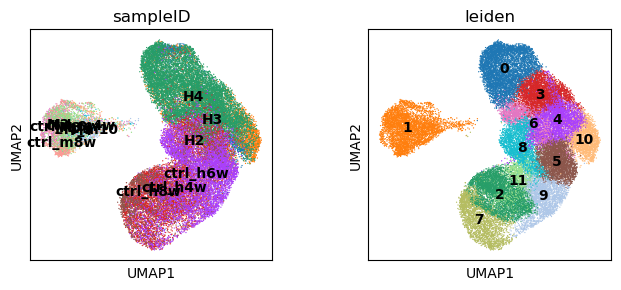

In [88]:
sc.pl.umap(rna, color = ['sampleID', 'leiden'], show = False, legend_loc = 'on data')


# cross validate cluster with the later Seurat results & add IDs for HSC blast and Wt


In [71]:
obs_df = ccc_rna.obs
obs_df.head

<bound method NDFrame.head of                              n_genes_by_counts  total_counts  total_counts_mt  \
index                                                                           
AAACAGCCAGTCTATG-1_M2                     1952        4002.0            111.0   
AAACATGCAGGTTAAA-1_M2                     2425        5601.0             79.0   
AAACCAACACGCAACT-1_M2                     1838        3650.0             66.0   
AAACCGAAGGGCTAAA-1_M2                     1412        3377.0             17.0   
AAACCGGCAGTCTATG-1_M2                     1426        2444.0             20.0   
...                                        ...           ...              ...   
TTTGGTAAGCATGGTT-1_ctrl_h8w                632        1380.0            224.0   
TTTGGTAAGCTTCCCG-1_ctrl_h8w                565        1885.0            326.0   
TTTGGTGCATTGCAGC-1_ctrl_h8w                538        1131.0            138.0   
TTTGTCTAGGTCCTGA-1_ctrl_h8w                613        1409.0            219.0  

In [77]:
%%R -i obs_df
rna_seu_5_df = fread('data/rna_seu_5_meta_data.csv')
rna_seu_5_df[, cell_id := sub(".*__(.*)_.*", "\\1", rn) ]
rna_seu_5_df[, sample_cell_id := sub("(.*)_.*", "\\1", rn) ]
head(rna_seu_5_df)



                                  rn  orig.ident nCount_RNA nFeature_RNA
1: MA9_MSC_wk4__AAACAGCCAGTCTATG-1_1 MA9_MSC_wk4       4002         1952
2: MA9_MSC_wk4__AAACATGCAGGTTAAA-1_1 MA9_MSC_wk4       5601         2425
3: MA9_MSC_wk4__AAACCAACACGCAACT-1_1 MA9_MSC_wk4       3650         1838
4: MA9_MSC_wk4__AAACCGAAGGGCTAAA-1_1 MA9_MSC_wk4       3377         1412
5: MA9_MSC_wk4__AAACCGGCAGTCTATG-1_1 MA9_MSC_wk4       2444         1426
6: MA9_MSC_wk4__AAAGCACCAGTAGCCT-1_1 MA9_MSC_wk4       4689         1796
       umap1        umap2 RNA_snn_res.0.2 seurat_clusters RNA_snn_res.0.3
1: 1.1706018 -1.542247229               0               0               0
2: 1.6797081  0.009209223               0               0               0
3: 1.2898587  0.853295870               0               0               0
4: 2.3308993 -1.049500876               0               0               0
5: 0.1699622  0.079227037               0               0               0
6: 1.8740498  0.587203331               0    

In [81]:
%%R
length(setdiff(obs_tb$sample_cell_id, rna_seu_5_df$sample_cell_id))
length(intersect(obs_tb$sample_cell_id, rna_seu_5_df$sample_cell_id))

[1] 3623


In [86]:
%%R
obs_tb = as.data.table(obs_df, keep.rownames = T)
obs_tb[, idd := 1:nrow(obs_tb) ]
obs_tb[, sample_cell_id := paste0(sampleIDD, '__', sub('_.*', '', rn)) ]
table(obs_tb$leiden)


   0    1    2    3    4    5    6    7    8    9   10   11 
5136 4132 4095 3265 3209 2888 2508 2356 2282 2161 1975 1255 


In [95]:
%%R
obs_tb_2 = merge(obs_tb, rna_seu_5_df[, .(sample_cell_id, seurat_clusters_adj)], all.x = T, by = 'sample_cell_id')
table(obs_tb_2$leiden, obs_tb_2$seurat_clusters_adj)
table(obs_tb_2$sampleIDD, obs_tb_2$seurat_clusters_adj)
                 

              
                 1   2   3   4
  Ctrl_HSC_wk4   0   0   0   0
  Ctrl_HSC_wk6   0   0   0   0
  Ctrl_HSC_wk8   0   0   0   0
  Ctrl_MSC_wk4 102 162   2   0
  Ctrl_MSC_wk6 380 551   5   1
  Ctrl_MSC_wk8 157  82  21   0
  MA9_HSC_wk4    0   0   0   0
  MA9_HSC_wk6    0   0   0   0
  MA9_HSC_wk8    0   0   0   0
  MA9_MSC_wk4    1  30 857   1
  MA9_MSC_wk6    0   4 329   0
  MA9_MSC_wk8    1   0 315 625


In [102]:
%%R 
table(obs_tb_2$cell_type, obs_tb_2$seurat_clusters_adj)

     
         1    2    3    4
  HSC    0    0    0    0
  MSC  641  829 1529  627


In [106]:
%%R
options(width = 200)
print(colnames(obs_tb_2))
print(obs_tb_2$leiden_ma9)

 [1] "sample_cell_id"               "rn"                           "n_genes_by_counts"            "total_counts"                 "total_counts_mt"              "pct_counts_mt"               
 [7] "total_counts_ribo"            "pct_counts_ribo"              "total_counts_hb"              "pct_counts_hb"                "leiden"                       "ngfr_predicted_labels"       
[13] "ngfr_over_clustering"         "ngfr_majority_voting"         "ngfr_conf_score"              "wk4_predicted_labels"         "wk4_over_clustering"          "wk4_majority_voting"         
[19] "wk4_conf_score"               "wk6_predicted_labels"         "wk6_over_clustering"          "wk6_majority_voting"          "wk6_conf_score"               "wk8_predicted_labels"        
[25] "wk8_over_clustering"          "wk8_majority_voting"          "wk8_conf_score"               "oldway_predicted_labels"      "oldway_over_clustering"       "oldway_majority_voting"      
[31] "oldway_conf_score"            "dp_predi

In [ ]:
%%R
obs_tb_2[cell_type == 'HSC' & time_point == 8, 

In [97]:
%R head(obs_tb_2)

sample_cell_id                           rn  \
1  Ctrl_HSC_wk4__AAACAGCCAAGCTAAA-1  AAACAGCCAAGCTAAA-1_ctrl_h4w   
2  Ctrl_HSC_wk4__AAACAGCCAATCGCAC-1  AAACAGCCAATCGCAC-1_ctrl_h4w   
3  Ctrl_HSC_wk4__AAACAGCCAATTTAGC-1  AAACAGCCAATTTAGC-1_ctrl_h4w   
4  Ctrl_HSC_wk4__AAACATGCAAATTGCT-1  AAACATGCAAATTGCT-1_ctrl_h4w   
5  Ctrl_HSC_wk4__AAACATGCACAGCCTG-1  AAACATGCACAGCCTG-1_ctrl_h4w   
6  Ctrl_HSC_wk4__AAACATGCACGAACAG-1  AAACATGCACGAACAG-1_ctrl_h4w   

   n_genes_by_counts  total_counts  total_counts_mt  pct_counts_mt  \
1               2346        5408.0            881.0      16.290682   
2               1010        2208.0            277.0      12.545291   
3                423         881.0            147.0      16.685585   
4                863        1641.0            213.0      12.979891   
5               2625        6006.0            833.0      13.869465   
6               2441        5832.0            801.0      13.734568   

   total_counts_ribo  pct_counts_ribo  total_counts_hb  pct_counts_hb  ...  \
1              290.0         5.362426              1.0       0.018491  ...   
2               53.0         2.400362              1.0       0.045290  ...   
3               60.0         6.810442              0.0       0.000000  ...   
4              183.0        11.151737              0.0       0.000000  ...   
5              400.0         6.660007              1.0       0.016650  ...   
6              319.0         5.469822              3.0       0.051440  ...   

  Cxcl12 Pdgfra sample_name     sampleIDD  model cell_type sample_type  \
1    0.0    0.0    ctrl_h4w  Ctrl_HSC_wk4    ma9       HSC        Ctrl   
2    0.0    0.0    ctrl_h4w  Ctrl_HSC_wk4    ma9       HSC        Ctrl   
3    0.0    0.0    ctrl_h4w  Ctrl_HSC_wk4    ma9       HSC        Ctrl   
4    0.0    0.0    ctrl_h4w  Ctrl_HSC_wk4    ma9       HSC        Ctrl   
5    0.0    0.0    ctrl_h4w  Ctrl_HSC_wk4    ma9       HSC        Ctrl   
6    0.0    0.0    ctrl_h4w  Ctrl_HSC_wk4    ma9       HSC        Ctrl   

  time_point           tag seurat_clusters_adj  
1          4  Ctrl__4__HSC         -2147483648  
2          4  Ctrl__4__HSC         -2147483648  
3          4  Ctrl__4__HSC         -2147483648  
4          4  Ctrl__4__HSC         -2147483648  
5          4  Ctrl__4__HSC         -2147483648  
6          4  Ctrl__4__HSC         -2147483648  

[6 rows x 69 columns]

In [100]:
%%R
table(obs_tb_2$sampleID)



      H2       H3       H4       M2       M3       M4 ctrl_h4w ctrl_h6w 
    2138     3331    10592     1034      357     1041     7906     5895 
ctrl_h8w ctrl_m4w ctrl_m6w ctrl_m8w 
    1237      326     1063      344 


In [98]:
%%R 
table(obs_tb_2$wk6_majority_voting)



  MA9    WT 
15574 19690 


# run liana for MA9 model

In [35]:
from liana.method import singlecellsignalr, connectome, cellphonedb, natmi, logfc, cellchat, geometric_mean


In [36]:
cellphonedb(ccc_rna_ma9, groupby='cell_type', expr_prop=0.1, resource_name='mouseconsensus', verbose=True, key_added='cpdb_res', layer = 'counts', use_raw = False)


2024-05-22 07:45:33 - INFO - Using the `counts` layer!
2024-05-22 07:45:34 - WARNING - 883 features of mat are empty, they will be removed.
2024-05-22 07:45:35 - WARNING - Converting `cell_type` to categorical!
2024-05-22 07:45:36 - INFO - Using resource `mouseconsensus`.
2024-05-22 07:45:37 - INFO - 0.38 of entities in the resource are missing from the data.


Generating ligand-receptor stats for 35262 samples and 904 features


100%|██████████| 1000/1000 [00:45<00:00, 21.81it/s]


2024-05-22 07:51:55 - INFO - Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


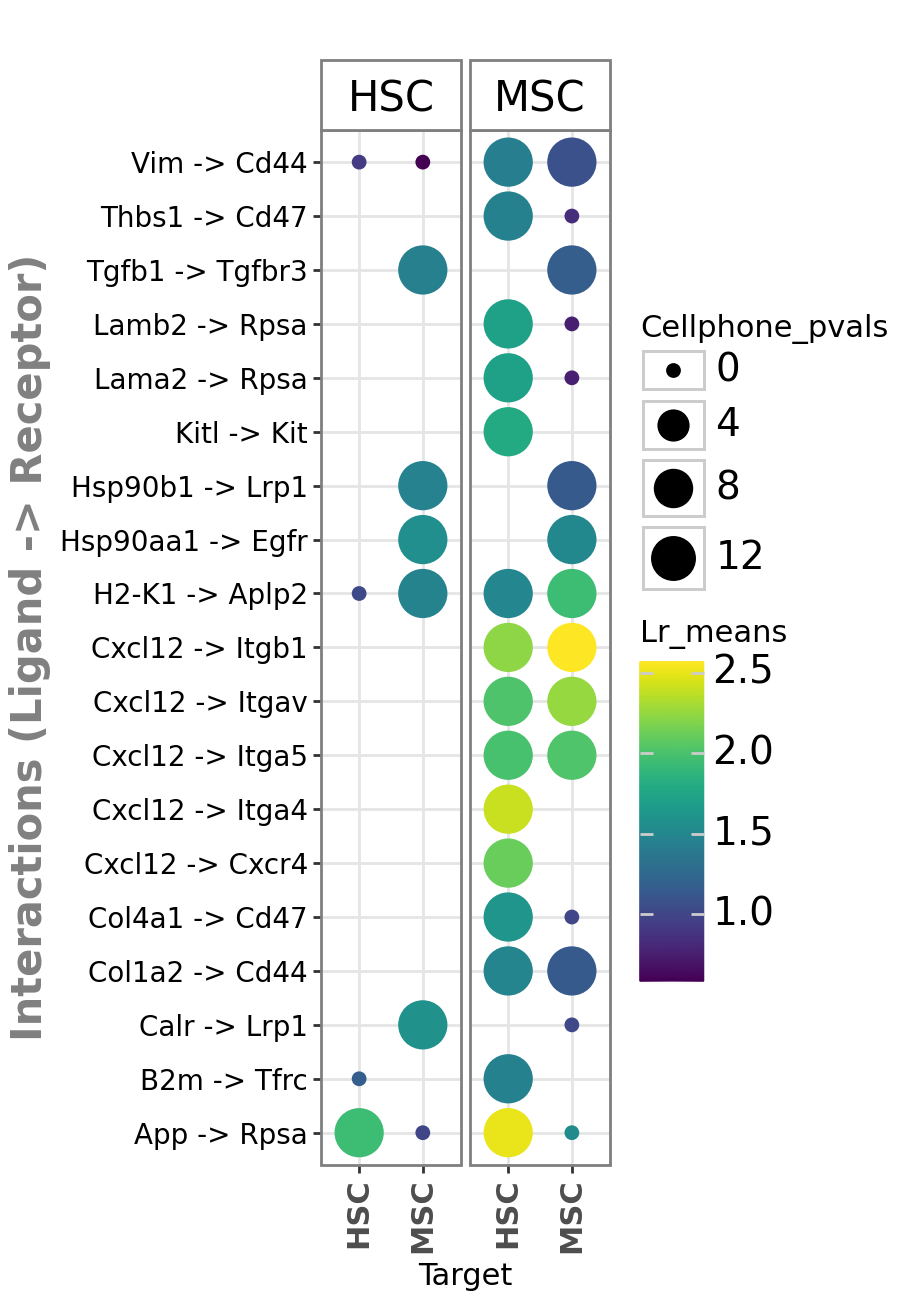

In [37]:
# add interaction
tmp_dt = ccc_rna_ma9.uns['cpdb_res']
tmp_dt['interaction'] = tmp_dt[['ligand', 'receptor']].apply(lambda row: ' -> '.join(row.values.astype(str)), axis = 1)

# copy the result and do filtering 
tmp_dt = ccc_rna_ma9.uns['cpdb_res'].copy()
tmp_dt = tmp_dt.loc[tmp_dt['source'] != tmp_dt['target']]
#tmp_dt['specificity_rank_invert'] = -np.log10(tmp_dt['specificity_rank'] + np.finfo(float).eps)
#tmp_dt['magnitude_rank_invert']   = -np.log10(tmp_dt['magnitude_rank']   + np.finfo(float).eps)
#tmp_dt['interaction'] = tmp_dt['ligand_complex'] + ' -> ' + tmp_dt['receptor_complex']
tmp_dt = tmp_dt.loc[tmp_dt['cellphone_pvals']<0.05].nlargest(20, 'lr_means')
interaction_sel = tmp_dt['interaction']
tmp_dt = ccc_rna_ma9.uns['cpdb_res'].copy()
plotdat = tmp_dt.loc[tmp_dt['interaction'].isin(interaction_sel)]
ccc_rna_ma9.uns['cpdb_res_sel'] = plotdat

li.pl.dotplot(adata = ccc_rna_ma9, colour='lr_means', size='cellphone_pvals', inverse_size=True, #source_labels=['MSC'], target_labels=['HSC'],
              figure_size=(4.5, 6.5), filter_fun=lambda x: x['cellphone_pvals'] <= 0.01, uns_key='cpdb_res_sel' )


In [38]:
cellchat(ccc_rna_ma9, groupby='cell_type', expr_prop=0.1, resource_name='mouseconsensus', verbose=True, key_added='cc_res', layer = 'counts', use_raw = False)


2024-05-22 07:51:57 - INFO - Using the `counts` layer!
2024-05-22 07:51:58 - WARNING - 883 features of mat are empty, they will be removed.
2024-05-22 07:51:59 - WARNING - Converting `cell_type` to categorical!
2024-05-22 07:52:03 - INFO - Using resource `mouseconsensus`.
2024-05-22 07:52:03 - INFO - 0.38 of entities in the resource are missing from the data.


Generating ligand-receptor stats for 35262 samples and 904 features


100%|██████████| 1000/1000 [18:24<00:00,  1.10s/it]


In [39]:
ccc_rna_ma9.uns['cc_res']


ligand ligand_complex  ligand_props  ligand_trimean   mat_max receptor  \
127     App            App      0.808792        0.234512  8.624774     Rpsa   
811  Cxcl12         Cxcl12      0.951477        0.473588  8.624774    Itgb1   
287  Cxcl12         Cxcl12      0.951477        0.473588  8.624774    Itga4   
564   H2-K1          H2-K1      0.926736        0.336034  8.624774    Aplp2   
686     Tnc            Tnc      0.776123        0.263009  8.624774     Egfr   
..      ...            ...           ...             ...       ...      ...   
495    Slpi           Slpi      0.568025        0.191955  8.624774   Plscr4   
496  Lrpap1         Lrpap1      0.172063        0.000000  8.624774     Lrp1   
506    Rtn4           Rtn4      0.380591        0.038083  8.624774  Rtn4rl1   
507     Vim            Vim      0.459661        0.046773  8.624774     Cd44   
512    Slpi           Slpi      0.568025        0.191955  8.624774   Plscr1   

    receptor_complex  receptor_props  receptor_trimean source target  \
127             Rpsa        0.970288          0.387405    MSC    HSC   
811            Itgb1        0.680038          0.149842    MSC    MSC   
287            Itga4        0.541271          0.109733    MSC    HSC   
564            Aplp2        0.639683          0.137455    MSC    MSC   
686             Egfr        0.690848          0.169244    MSC    MSC   
..               ...             ...               ...    ...    ...   
495           Plscr4        0.156858          0.000000    HSC    MSC   
496             Lrp1        0.604132          0.128553    HSC    MSC   
506          Rtn4rl1        0.163104          0.000000    HSC    MSC   
507             Cd44        0.234446          0.000000    HSC    MSC   
512           Plscr1        0.113380          0.000000    HSC    MSC   

     lr_probs  cellchat_pvals  
127  0.153763             0.0  
811  0.124287             0.0  
287  0.094150             0.0  
564  0.084567             0.0  
686  0.081748             0.0  
..        ...             ...  
495  0.000000             1.0  
496  0.000000             1.0  
506  0.000000             1.0  
507  0.000000             1.0  
512  0.000000             1.0  

[880 rows x 13 columns]

2024-05-22 08:11:06 - INFO - Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


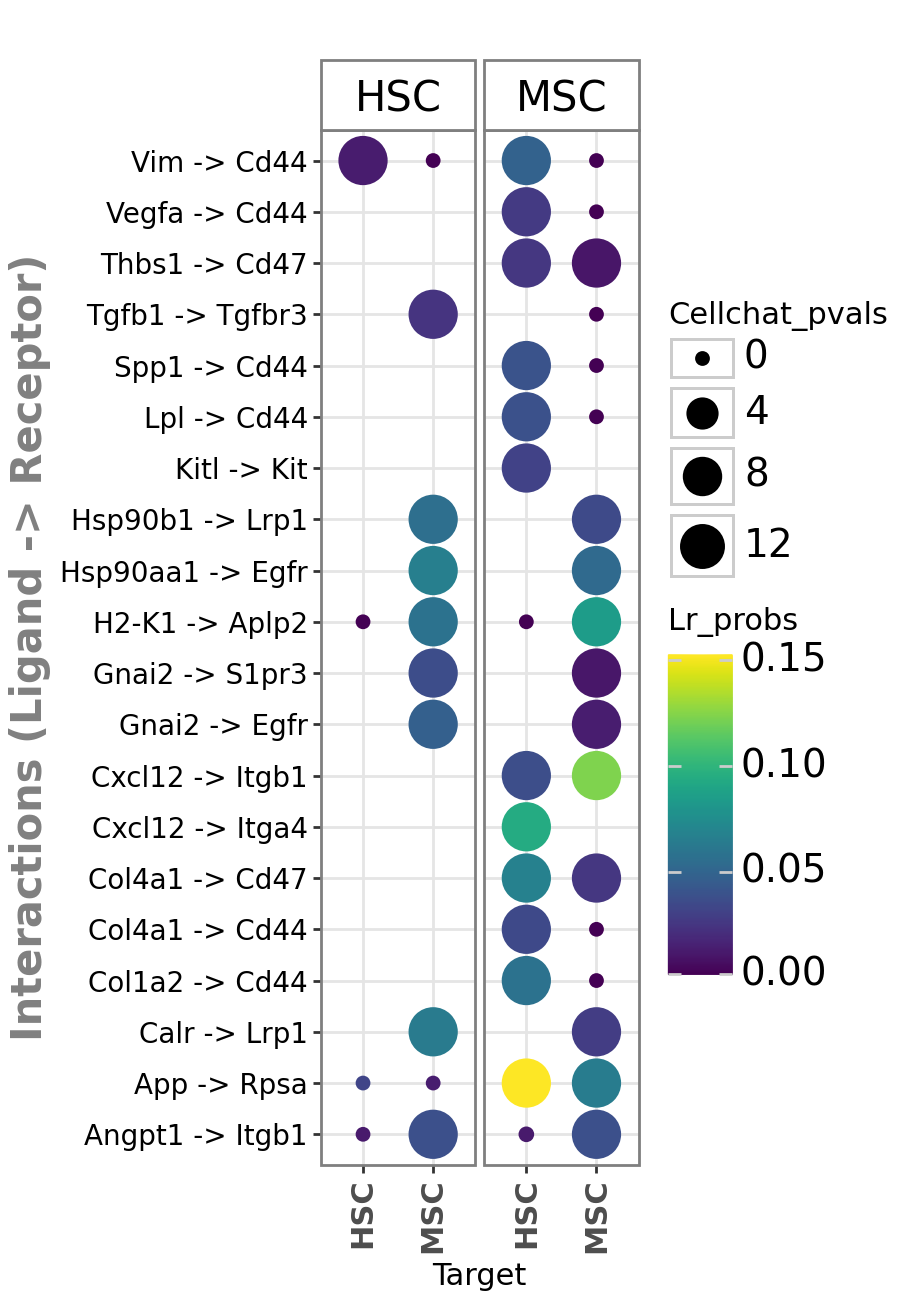

In [40]:
# add interaction
tmp_dt = ccc_rna_ma9.uns['cc_res']
tmp_dt['interaction'] = tmp_dt[['ligand', 'receptor']].apply(lambda row: ' -> '.join(row.values.astype(str)), axis = 1)

# copy the result and do filtering 
tmp_dt = ccc_rna_ma9.uns['cc_res'].copy()
tmp_dt = tmp_dt.loc[tmp_dt['source'] != tmp_dt['target']]
#tmp_dt['specificity_rank_invert'] = -np.log10(tmp_dt['specificity_rank'] + np.finfo(float).eps)
#tmp_dt['magnitude_rank_invert']   = -np.log10(tmp_dt['magnitude_rank']   + np.finfo(float).eps)
#tmp_dt['interaction'] = tmp_dt['ligand_complex'] + ' -> ' + tmp_dt['receptor_complex']
tmp_dt = tmp_dt.loc[tmp_dt['cellchat_pvals']<0.05].nlargest(20, 'lr_probs')
interaction_sel = tmp_dt['interaction']
tmp_dt = ccc_rna_ma9.uns['cc_res'].copy()
plotdat = tmp_dt.loc[tmp_dt['interaction'].isin(interaction_sel)]
ccc_rna_ma9.uns['cc_res_sel'] = plotdat

li.pl.dotplot(adata = ccc_rna_ma9, colour='lr_probs', size='cellchat_pvals', inverse_size=True, #source_labels=['MSC'], target_labels=['HSC'],
              figure_size=(4.5, 6.5), filter_fun=lambda x: x['cellchat_pvals'] <= 0.01, uns_key='cc_res_sel' )


In [41]:
li.mt.rank_aggregate(ccc_rna_ma9, resource_name = 'mouseconsensus', groupby='cell_type', expr_prop=0.1, verbose=True, layer = 'counts', use_raw = False)


2024-05-22 08:11:06 - INFO - Using the `counts` layer!
2024-05-22 08:11:07 - WARNING - 883 features of mat are empty, they will be removed.
2024-05-22 08:11:08 - WARNING - Converting `cell_type` to categorical!
2024-05-22 08:11:13 - INFO - Using resource `mouseconsensus`.
2024-05-22 08:11:13 - INFO - 0.38 of entities in the resource are missing from the data.


Generating ligand-receptor stats for 35262 samples and 904 features
Assuming that counts were `natural` log-normalized!
Running CellPhoneDB


100%|██████████| 1000/1000 [00:46<00:00, 21.43it/s]


Running Connectome
Running log2FC
Running NATMI
Running SingleCellSignalR


2024-05-22 08:12:04 - INFO - Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


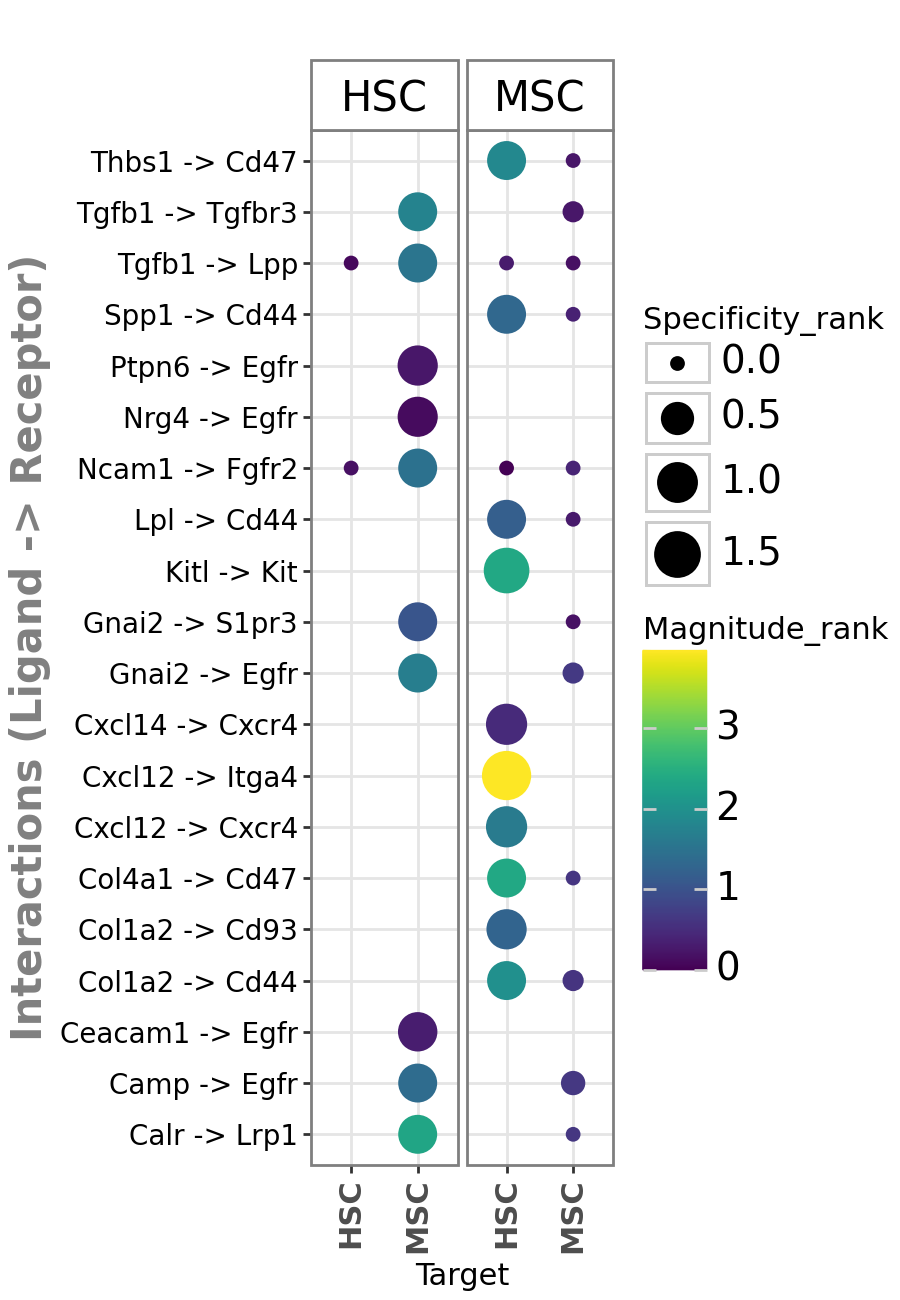

In [42]:
# add interaction
tmp_dt = ccc_rna_ma9.uns['liana_res']
tmp_dt['interaction'] = tmp_dt[['ligand_complex', 'receptor_complex']].apply(lambda row: ' -> '.join(row.values.astype(str)), axis = 1)

# copy the result and do filtering 
tmp_dt = ccc_rna_ma9.uns['liana_res'].copy()
tmp_dt = tmp_dt.loc[tmp_dt['source'] != tmp_dt['target']]
tmp_dt['specificity_rank_invert'] = -np.log10(tmp_dt['specificity_rank'] + np.finfo(float).eps)
#tmp_dt['magnitude_rank_invert']   = -np.log10(tmp_dt['magnitude_rank']   + np.finfo(float).eps)
#tmp_dt['interaction'] = tmp_dt['ligand_complex'] + ' -> ' + tmp_dt['receptor_complex']
tmp_dt = tmp_dt.nlargest(20, 'specificity_rank_invert')
interaction_sel = tmp_dt['interaction']
tmp_dt = ccc_rna_ma9.uns['liana_res'].copy()
plotdat = tmp_dt.loc[tmp_dt['interaction'].isin(interaction_sel)]
ccc_rna_ma9.uns['liana_res_sel'] = plotdat.copy()

li.pl.dotplot(adata = ccc_rna_ma9, colour='magnitude_rank', size='specificity_rank', inverse_size=True, inverse_colour = True, 
              figure_size=(4.5, 6.5), uns_key='liana_res_sel')


In [43]:
ccc_rna_ma9.uns['liana_res'] 

source target ligand_complex receptor_complex  lr_means  cellphone_pvals  \
285    MSC    HSC            App             Rpsa  2.508447              0.0   
637    MSC    MSC         Cxcl12            Itgb1  2.576626              0.0   
335    MSC    HSC         Cxcl12            Itga4  2.406061              0.0   
636    MSC    MSC         Cxcl12            Itgav  2.262335              0.0   
638    MSC    MSC         Cxcl12             Sdc4  2.242203              0.0   
..     ...    ...            ...              ...       ...              ...   
879    MSC    MSC           Ybx1           Notch1  0.394007              1.0   
76     HSC    HSC          Nampt             Insr  0.312210              1.0   
75     HSC    HSC           Lyz2            Itgal  0.318884              0.0   
87     HSC    HSC          Psen1           Notch2  0.416900              1.0   
86     HSC    HSC          Psen1           Notch1  0.312646              0.0   

     expr_prod  scaled_weight  lr_logfc  spec_weight   lrscore  \
285   5.791618       0.627296  1.993873     0.518246  0.937381   
637   5.023573       1.639706  3.601289     0.673512  0.933073   
335   3.711040       1.353841  4.036174     0.950365  0.922975   
636   2.605033       1.667598  3.610201     0.778045  0.909417   
638   2.450107       2.059028  3.878684     0.998002  0.906859   
..         ...            ...       ...          ...       ...   
879   0.139977      -0.212684 -0.327732     0.181152  0.699448   
76    0.082285      -0.039229 -0.467878     0.125881  0.640844   
75    0.095485       0.045291  0.692974     0.704249  0.657780   
87    0.173364      -0.019297 -0.226657     0.205410  0.721442   
86    0.090820       0.006841  0.066617     0.272800  0.652120   

     specificity_rank  magnitude_rank      interaction  
285          0.234467        0.000046      App -> Rpsa  
637          0.044399        0.000046  Cxcl12 -> Itgb1  
335          0.018151        0.000104  Cxcl12 -> Itga4  
636          0.035982        0.000566  Cxcl12 -> Itgav  
638          0.000027        0.000739   Cxcl12 -> Sdc4  
..                ...             ...              ...  
879          1.000000        1.000000   Ybx1 -> Notch1  
76           1.000000        1.000000    Nampt -> Insr  
75           1.000000        1.000000    Lyz2 -> Itgal  
87           1.000000        1.000000  Psen1 -> Notch2  
86           1.000000        1.000000  Psen1 -> Notch1  

[880 rows x 14 columns]

2024-05-22 08:12:05 - INFO - Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


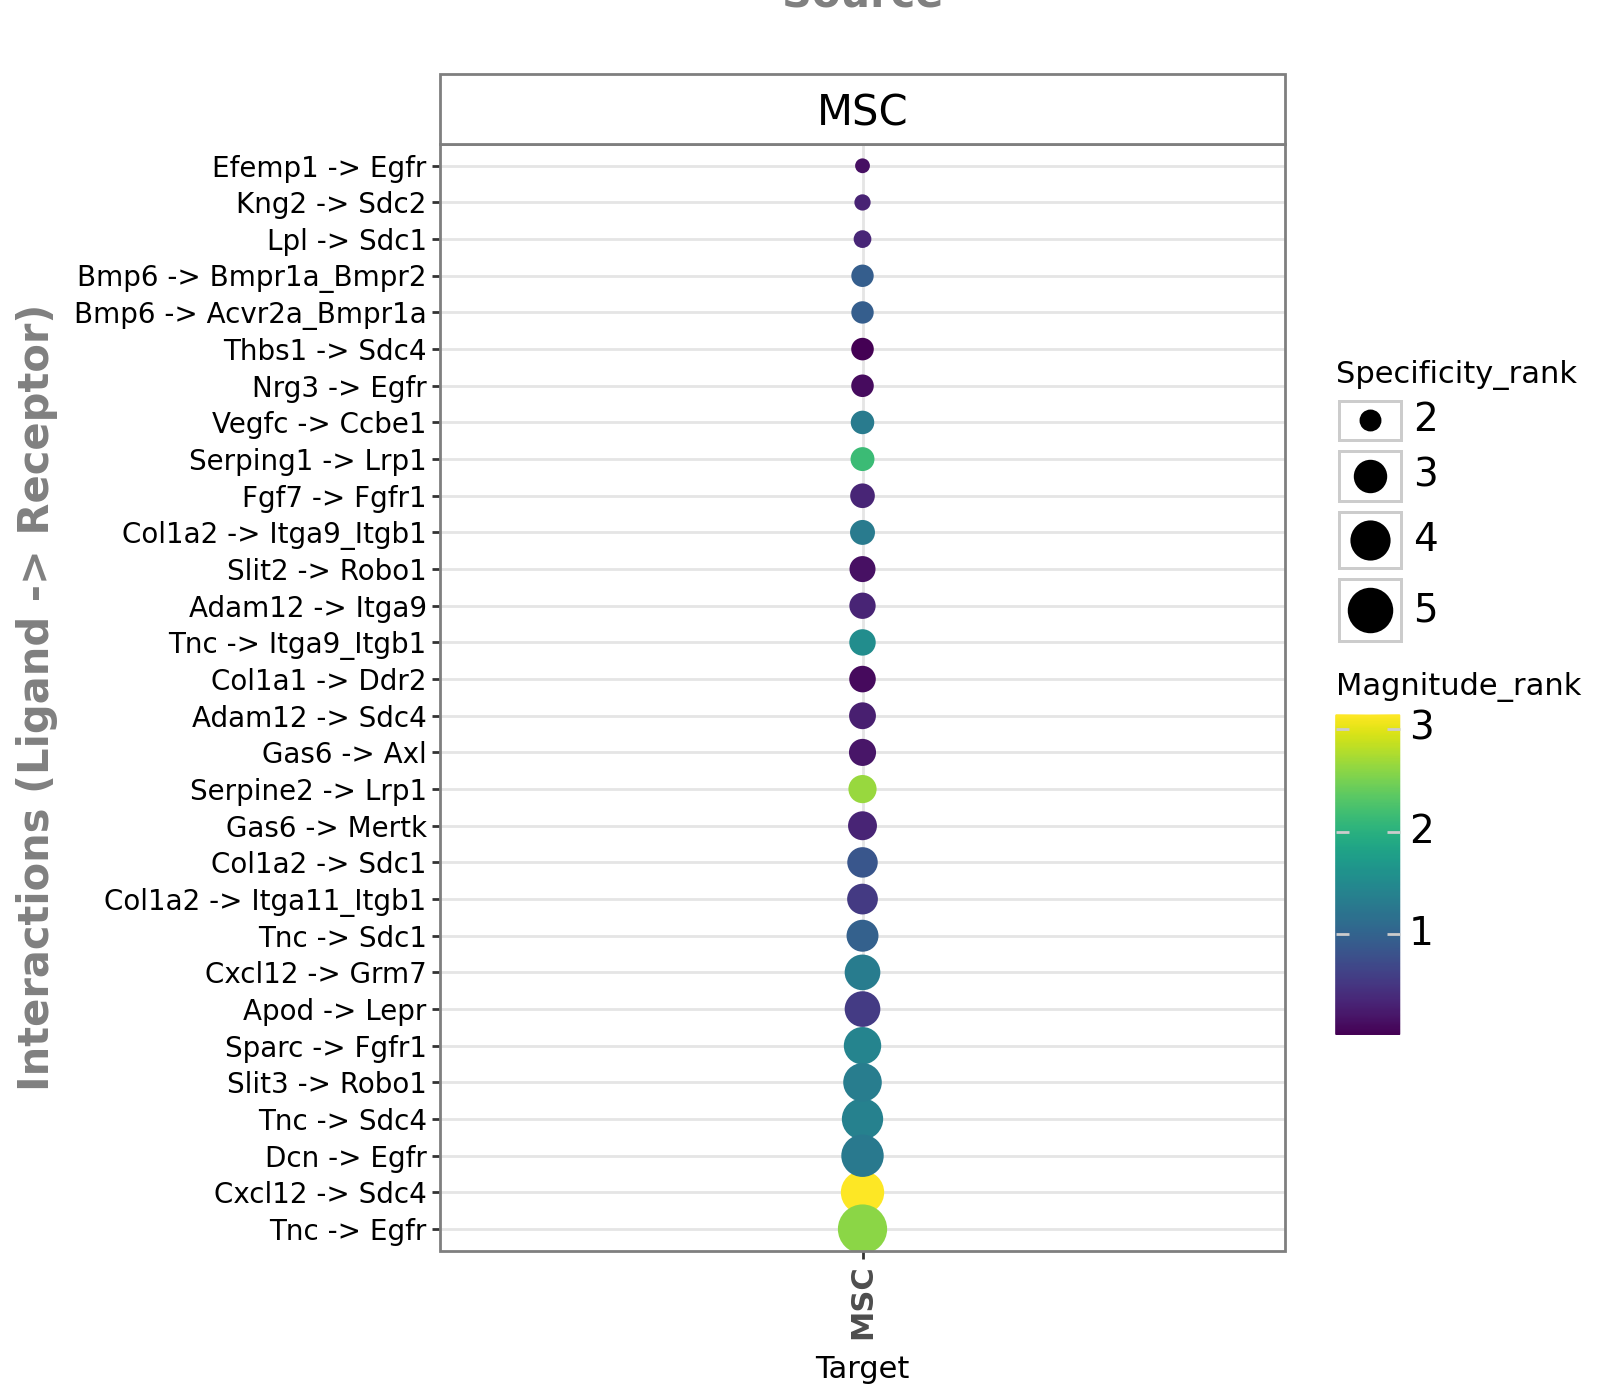

In [44]:
li.pl.dotplot(adata = ccc_rna_ma9, colour='magnitude_rank', size='specificity_rank',
              inverse_size=True, inverse_colour=True, top_n=30,
              orderby='specificity_rank', orderby_ascending=True, figure_size=(8, 7) )


# run liana for Ctrl 

In [45]:
cellphonedb(ccc_rna_ctr, groupby='cell_type', expr_prop=0.1, resource_name='mouseconsensus', verbose=True, key_added='cpdb_res', layer = 'counts', use_raw = False)
cellchat(ccc_rna_ctr, groupby='cell_type', expr_prop=0.1, resource_name='mouseconsensus', verbose=True, key_added='cc_res', layer = 'counts', use_raw = False)


2024-05-22 08:12:05 - INFO - Using the `counts` layer!
2024-05-22 08:12:05 - WARNING - 883 features of mat are empty, they will be removed.
2024-05-22 08:12:07 - WARNING - Converting `cell_type` to categorical!
2024-05-22 08:12:08 - INFO - Using resource `mouseconsensus`.
2024-05-22 08:12:08 - INFO - 0.38 of entities in the resource are missing from the data.


Generating ligand-receptor stats for 35262 samples and 904 features


100%|██████████| 1000/1000 [00:32<00:00, 31.09it/s]
2024-05-22 08:12:45 - INFO - Using the `counts` layer!
2024-05-22 08:12:45 - WARNING - 883 features of mat are empty, they will be removed.
2024-05-22 08:12:47 - WARNING - Converting `cell_type` to categorical!
2024-05-22 08:12:50 - INFO - Using resource `mouseconsensus`.
2024-05-22 08:12:51 - INFO - 0.38 of entities in the resource are missing from the data.


Generating ligand-receptor stats for 35262 samples and 904 features


100%|██████████| 1000/1000 [18:17<00:00,  1.10s/it]


2024-05-22 08:31:46 - INFO - Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


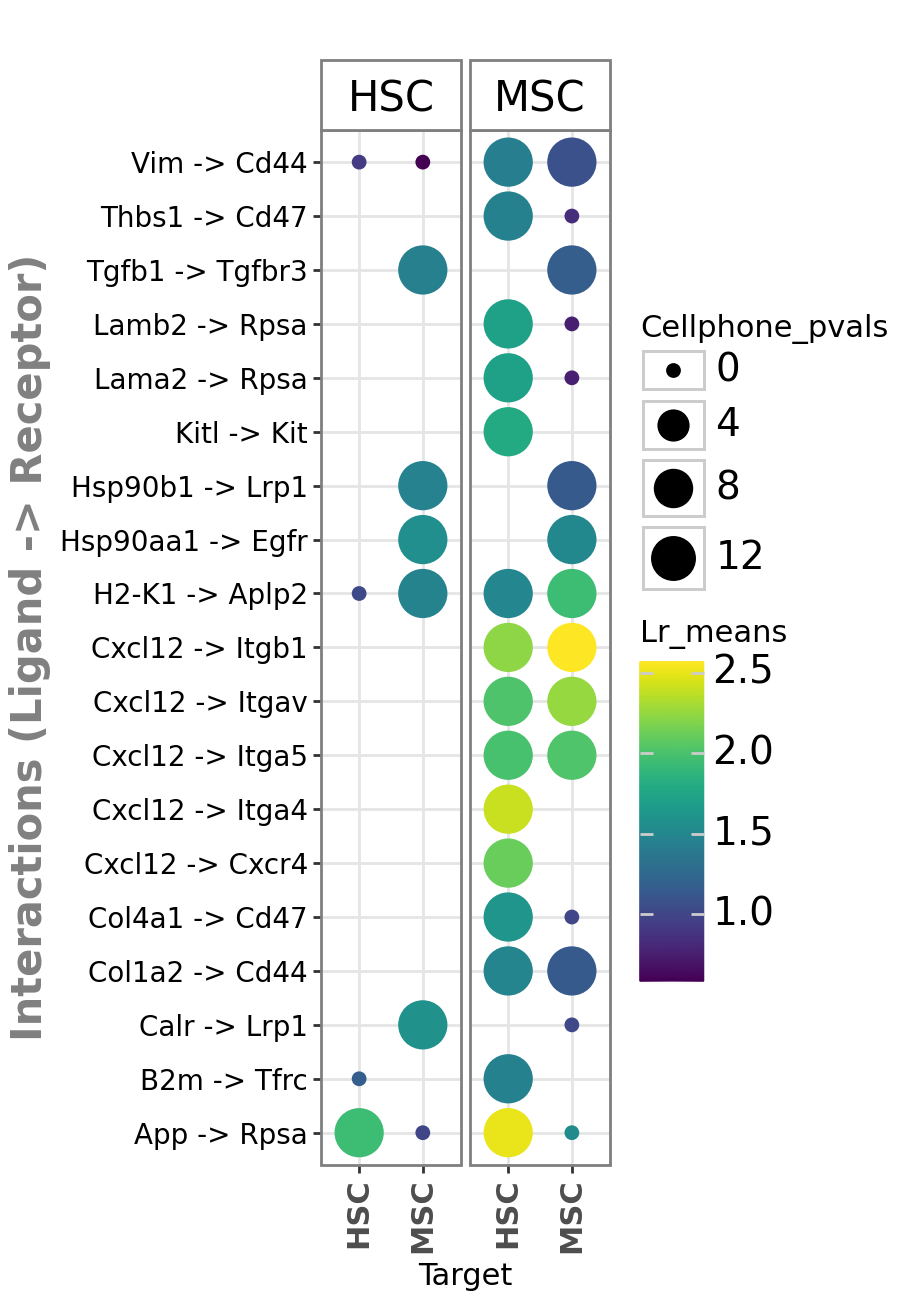

In [46]:
# add interaction
tmp_dt = ccc_rna_ctr.uns['cpdb_res']
tmp_dt['interaction'] = tmp_dt[['ligand', 'receptor']].apply(lambda row: ' -> '.join(row.values.astype(str)), axis = 1)

# copy the result and do filtering 
tmp_dt = ccc_rna_ctr.uns['cpdb_res'].copy()
tmp_dt = tmp_dt.loc[tmp_dt['source'] != tmp_dt['target']]
#tmp_dt['specificity_rank_invert'] = -np.log10(tmp_dt['specificity_rank'] + np.finfo(float).eps)
#tmp_dt['magnitude_rank_invert']   = -np.log10(tmp_dt['magnitude_rank']   + np.finfo(float).eps)
#tmp_dt['interaction'] = tmp_dt['ligand_complex'] + ' -> ' + tmp_dt['receptor_complex']
tmp_dt = tmp_dt.loc[tmp_dt['cellphone_pvals']<0.05].nlargest(20, 'lr_means')
interaction_sel = tmp_dt['interaction']
tmp_dt = ccc_rna_ctr.uns['cpdb_res'].copy()
plotdat = tmp_dt.loc[tmp_dt['interaction'].isin(interaction_sel)]
ccc_rna_ctr.uns['cpdb_res_sel'] = plotdat

li.pl.dotplot(adata = ccc_rna_ctr, colour='lr_means', size='cellphone_pvals', inverse_size=True, #source_labels=['MSC'], target_labels=['HSC'],
              figure_size=(4.5, 6.5), filter_fun=lambda x: x['cellphone_pvals'] <= 0.01, uns_key='cpdb_res_sel' )


2024-05-22 08:31:47 - INFO - Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


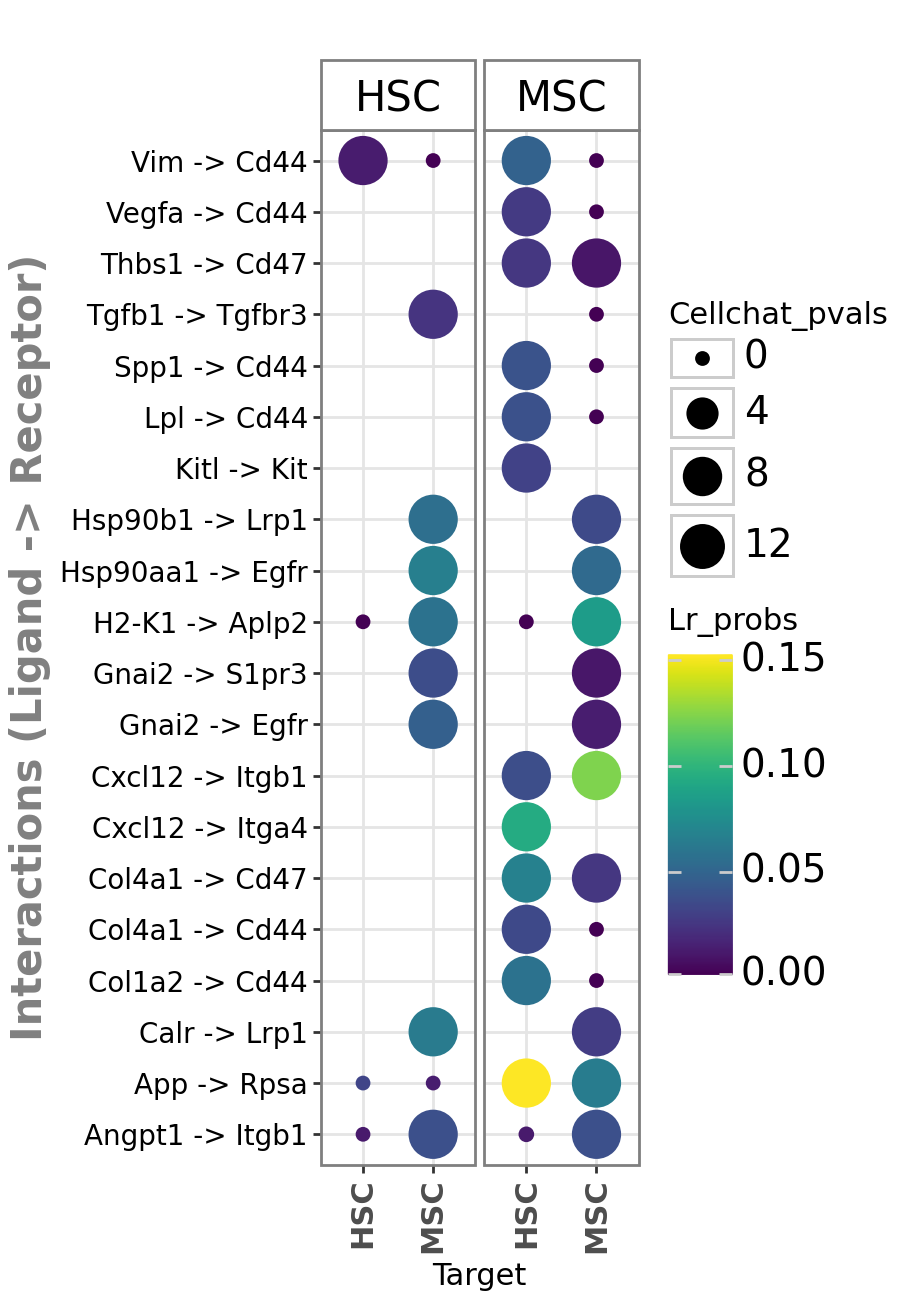

In [47]:
# add interaction
tmp_dt = ccc_rna_ctr.uns['cc_res']
tmp_dt['interaction'] = tmp_dt[['ligand', 'receptor']].apply(lambda row: ' -> '.join(row.values.astype(str)), axis = 1)

# copy the result and do filtering 
tmp_dt = ccc_rna_ctr.uns['cc_res'].copy()
tmp_dt = tmp_dt.loc[tmp_dt['source'] != tmp_dt['target']]
#tmp_dt['specificity_rank_invert'] = -np.log10(tmp_dt['specificity_rank'] + np.finfo(float).eps)
#tmp_dt['magnitude_rank_invert']   = -np.log10(tmp_dt['magnitude_rank']   + np.finfo(float).eps)
#tmp_dt['interaction'] = tmp_dt['ligand_complex'] + ' -> ' + tmp_dt['receptor_complex']
tmp_dt = tmp_dt.loc[tmp_dt['cellchat_pvals']<0.05].nlargest(20, 'lr_probs')
interaction_sel = tmp_dt['interaction']
tmp_dt = ccc_rna_ctr.uns['cc_res'].copy()
plotdat = tmp_dt.loc[tmp_dt['interaction'].isin(interaction_sel)]
ccc_rna_ctr.uns['cc_res_sel'] = plotdat

li.pl.dotplot(adata = ccc_rna_ctr, colour='lr_probs', size='cellchat_pvals', inverse_size=True, #source_labels=['MSC'], target_labels=['HSC'],
              figure_size=(4.5, 6.5), filter_fun=lambda x: x['cellchat_pvals'] <= 0.01, uns_key='cc_res_sel' )


In [48]:
li.mt.rank_aggregate(ccc_rna_ctr, resource_name = 'mouseconsensus', groupby='cell_type', expr_prop=0.1, verbose=True, layer = 'counts', use_raw = False)


2024-05-22 08:31:47 - INFO - Using the `counts` layer!
2024-05-22 08:31:47 - WARNING - 883 features of mat are empty, they will be removed.
2024-05-22 08:31:49 - WARNING - Converting `cell_type` to categorical!
2024-05-22 08:31:54 - INFO - Using resource `mouseconsensus`.
2024-05-22 08:31:54 - INFO - 0.38 of entities in the resource are missing from the data.


Generating ligand-receptor stats for 35262 samples and 904 features
Assuming that counts were `natural` log-normalized!
Running CellPhoneDB


100%|██████████| 1000/1000 [00:45<00:00, 21.87it/s]


Running Connectome
Running log2FC
Running NATMI
Running SingleCellSignalR


2024-05-22 08:32:44 - INFO - Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


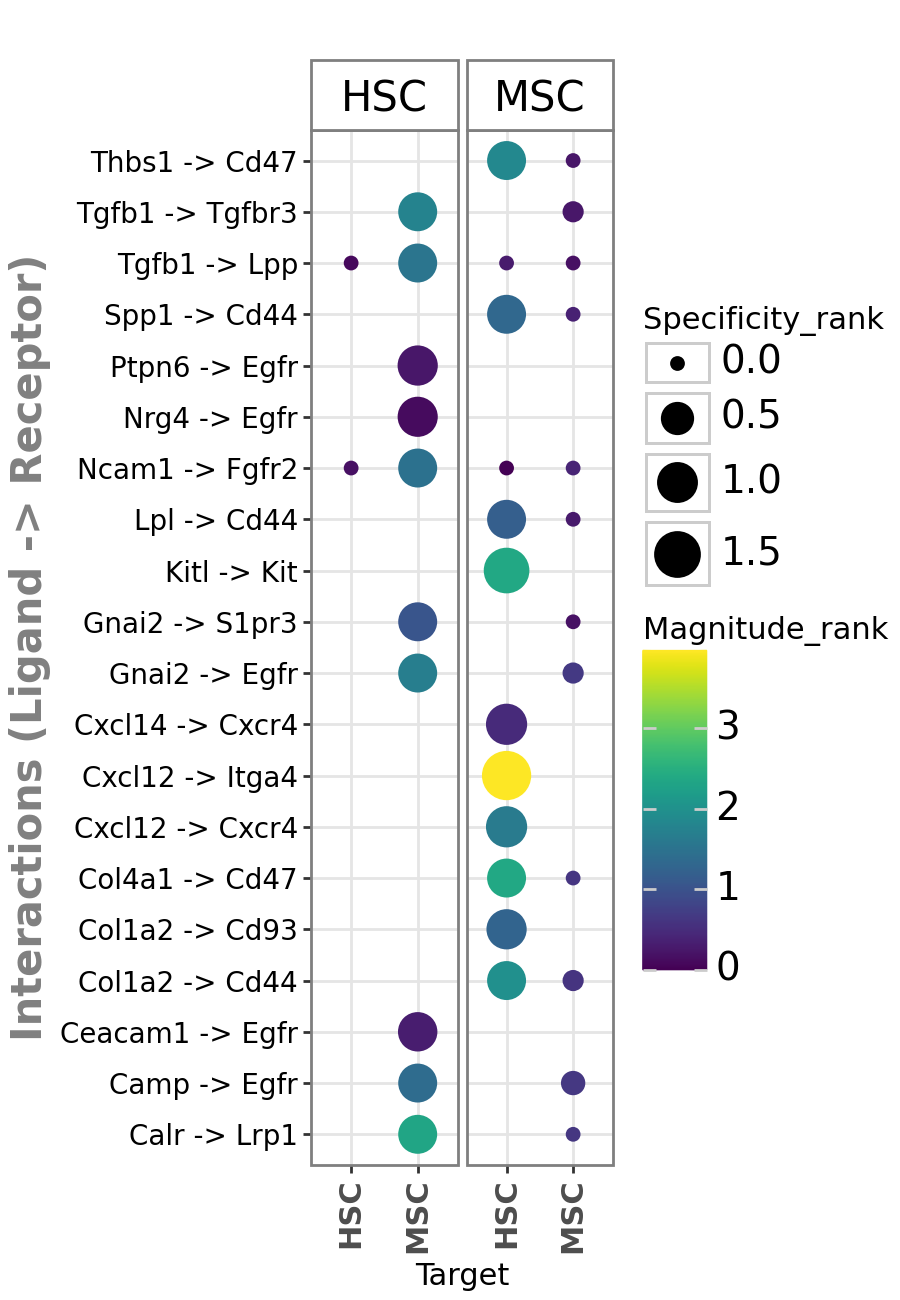

In [49]:
# add interaction
tmp_dt = ccc_rna_ctr.uns['liana_res']
tmp_dt['interaction'] = tmp_dt[['ligand_complex', 'receptor_complex']].apply(lambda row: ' -> '.join(row.values.astype(str)), axis = 1)

# copy the result and do filtering 
tmp_dt = ccc_rna_ctr.uns['liana_res'].copy()
tmp_dt = tmp_dt.loc[tmp_dt['source'] != tmp_dt['target']]
tmp_dt['specificity_rank_invert'] = -np.log10(tmp_dt['specificity_rank'] + np.finfo(float).eps)
#tmp_dt['magnitude_rank_invert']   = -np.log10(tmp_dt['magnitude_rank']   + np.finfo(float).eps)
#tmp_dt['interaction'] = tmp_dt['ligand_complex'] + ' -> ' + tmp_dt['receptor_complex']
tmp_dt = tmp_dt.nlargest(20, 'specificity_rank_invert')
interaction_sel = tmp_dt['interaction']
tmp_dt = ccc_rna_ctr.uns['liana_res'].copy()
plotdat = tmp_dt.loc[tmp_dt['interaction'].isin(interaction_sel)]
ccc_rna_ctr.uns['liana_res_sel'] = plotdat.copy()

li.pl.dotplot(adata = ccc_rna_ctr, colour='magnitude_rank', size='specificity_rank', inverse_size=True, inverse_colour = True, 
              figure_size=(4.5, 6.5), uns_key='liana_res_sel')


2024-05-22 08:32:44 - INFO - Fontsize 0.00 < 1.0 pt not allowed by FreeType. Setting fontsize = 1 pt


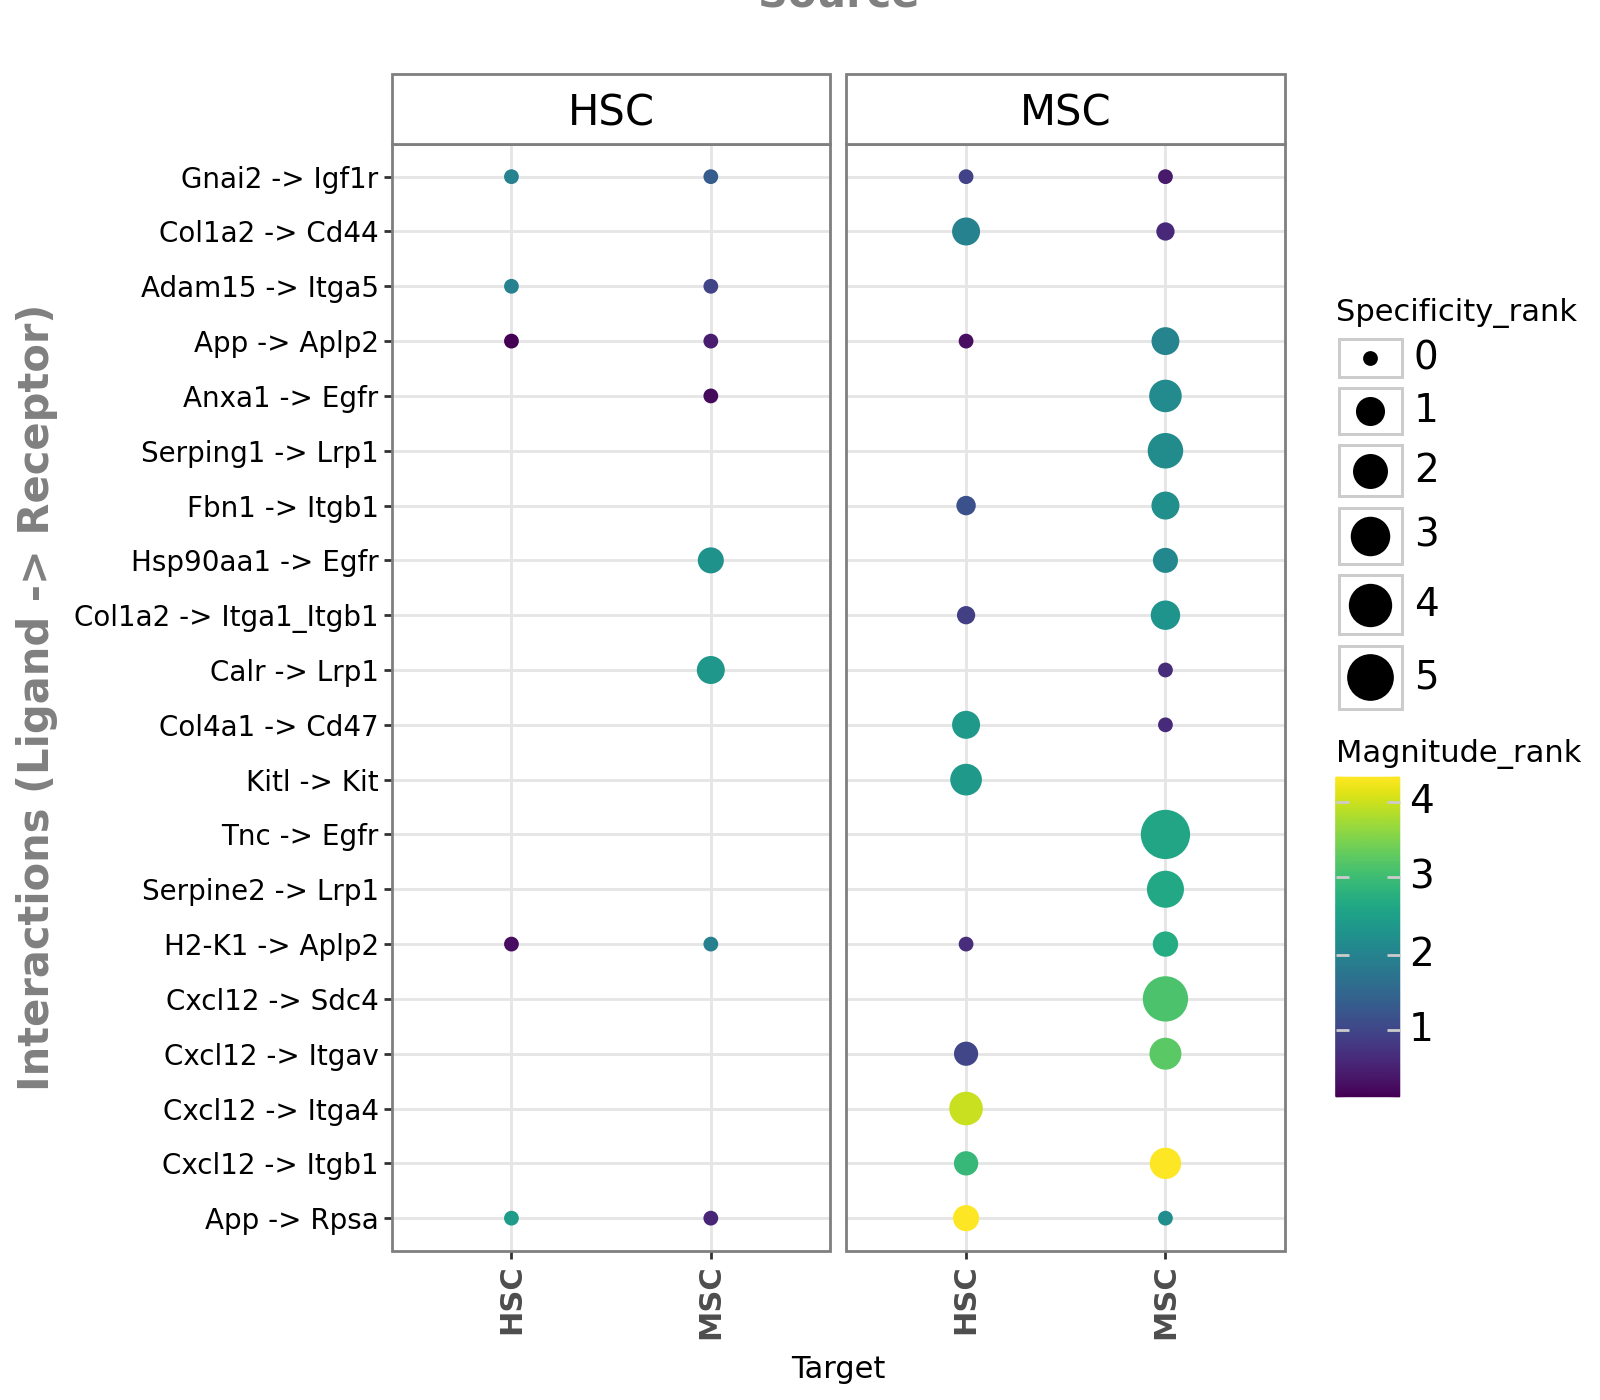

In [50]:
li.pl.dotplot(adata = ccc_rna_ctr,
              colour='magnitude_rank',
              size='specificity_rank',
              inverse_size=True,
              inverse_colour=True,
              top_n=20,
              orderby='magnitude_rank',
              orderby_ascending=True,
              figure_size=(8, 7)
             )


# summarize ccc

In [51]:
ccc_rna_ma9.uns['liana_res']

source target ligand_complex receptor_complex  lr_means  cellphone_pvals  \
285    MSC    HSC            App             Rpsa  2.508447              0.0   
637    MSC    MSC         Cxcl12            Itgb1  2.576626              0.0   
335    MSC    HSC         Cxcl12            Itga4  2.406061              0.0   
636    MSC    MSC         Cxcl12            Itgav  2.262335              0.0   
638    MSC    MSC         Cxcl12             Sdc4  2.242203              0.0   
..     ...    ...            ...              ...       ...              ...   
879    MSC    MSC           Ybx1           Notch1  0.394007              1.0   
76     HSC    HSC          Nampt             Insr  0.312210              1.0   
75     HSC    HSC           Lyz2            Itgal  0.318884              0.0   
87     HSC    HSC          Psen1           Notch2  0.416900              1.0   
86     HSC    HSC          Psen1           Notch1  0.312646              0.0   

     expr_prod  scaled_weight  lr_logfc  spec_weight   lrscore  \
285   5.791618       0.627296  1.993873     0.518246  0.937381   
637   5.023573       1.639706  3.601289     0.673512  0.933073   
335   3.711040       1.353841  4.036174     0.950365  0.922975   
636   2.605033       1.667598  3.610201     0.778045  0.909417   
638   2.450107       2.059028  3.878684     0.998002  0.906859   
..         ...            ...       ...          ...       ...   
879   0.139977      -0.212684 -0.327732     0.181152  0.699448   
76    0.082285      -0.039229 -0.467878     0.125881  0.640844   
75    0.095485       0.045291  0.692974     0.704249  0.657780   
87    0.173364      -0.019297 -0.226657     0.205410  0.721442   
86    0.090820       0.006841  0.066617     0.272800  0.652120   

     specificity_rank  magnitude_rank      interaction  
285          0.234467        0.000046      App -> Rpsa  
637          0.044399        0.000046  Cxcl12 -> Itgb1  
335          0.018151        0.000104  Cxcl12 -> Itga4  
636          0.035982        0.000566  Cxcl12 -> Itgav  
638          0.000027        0.000739   Cxcl12 -> Sdc4  
..                ...             ...              ...  
879          1.000000        1.000000   Ybx1 -> Notch1  
76           1.000000        1.000000    Nampt -> Insr  
75           1.000000        1.000000    Lyz2 -> Itgal  
87           1.000000        1.000000  Psen1 -> Notch2  
86           1.000000        1.000000  Psen1 -> Notch1  

[880 rows x 14 columns]

In [52]:
ma9_dt = ccc_rna_ma9.uns['liana_res'].copy()
ctr_dt = ccc_rna_ctr.uns['liana_res'].copy()
ma9_dt['model'] = 'MA9'
ctr_dt['model'] = 'Ctr'
ccc_dt = pd.concat([ma9_dt, ctr_dt])
ccc_dt['specificity_rank_invert'] = -np.log10(ccc_dt['specificity_rank'] + np.finfo(float).eps)
ccc_dt['magnitude_rank_invert']   = -np.log10(ccc_dt['magnitude_rank']   + np.finfo(float).eps)
ccc_dt['interaction'] = ccc_dt['ligand_complex'] + ' -> ' + ccc_dt['receptor_complex']
#ccc_dt = ccc_dt.loc[ccc_dt['source'] == 'HSC']
ccc_dt.to_csv('liana.csv')
ccc_dt

source target ligand_complex receptor_complex  lr_means  cellphone_pvals  \
285    MSC    HSC            App             Rpsa  2.508447              0.0   
637    MSC    MSC         Cxcl12            Itgb1  2.576626              0.0   
335    MSC    HSC         Cxcl12            Itga4  2.406061              0.0   
636    MSC    MSC         Cxcl12            Itgav  2.262335              0.0   
638    MSC    MSC         Cxcl12             Sdc4  2.242203              0.0   
..     ...    ...            ...              ...       ...              ...   
879    MSC    MSC           Ybx1           Notch1  0.394007              1.0   
76     HSC    HSC          Nampt             Insr  0.312210              1.0   
75     HSC    HSC           Lyz2            Itgal  0.318884              0.0   
87     HSC    HSC          Psen1           Notch2  0.416900              1.0   
86     HSC    HSC          Psen1           Notch1  0.312646              0.0   

     expr_prod  scaled_weight  lr_logfc  spec_weight   lrscore  \
285   5.791618       0.627296  1.993873     0.518246  0.937381   
637   5.023573       1.639706  3.601289     0.673512  0.933073   
335   3.711040       1.353841  4.036174     0.950365  0.922975   
636   2.605033       1.667598  3.610201     0.778045  0.909417   
638   2.450107       2.059028  3.878684     0.998002  0.906859   
..         ...            ...       ...          ...       ...   
879   0.139977      -0.212684 -0.327732     0.181152  0.699448   
76    0.082285      -0.039229 -0.467878     0.125881  0.640844   
75    0.095485       0.045291  0.692974     0.704249  0.657780   
87    0.173364      -0.019297 -0.226657     0.205410  0.721442   
86    0.090820       0.006841  0.066617     0.272800  0.652120   

     specificity_rank  magnitude_rank      interaction model  \
285          0.234467        0.000046      App -> Rpsa   MA9   
637          0.044399        0.000046  Cxcl12 -> Itgb1   MA9   
335          0.018151        0.000104  Cxcl12 -> Itga4   MA9   
636          0.035982        0.000566  Cxcl12 -> Itgav   MA9   
638          0.000027        0.000739   Cxcl12 -> Sdc4   MA9   
..                ...             ...              ...   ...   
879          1.000000        1.000000   Ybx1 -> Notch1   Ctr   
76           1.000000        1.000000    Nampt -> Insr   Ctr   
75           1.000000        1.000000    Lyz2 -> Itgal   Ctr   
87           1.000000        1.000000  Psen1 -> Notch2   Ctr   
86           1.000000        1.000000  Psen1 -> Notch1   Ctr   

     specificity_rank_invert  magnitude_rank_invert  
285             6.299191e-01           4.333321e+00  
637             1.352624e+00           4.333321e+00  
335             1.741103e+00           3.981468e+00  
636             1.443919e+00           3.246836e+00  
638             4.569664e+00           3.131183e+00  
..                       ...                    ...  
879            -9.643275e-17          -9.643275e-17  
76             -9.643275e-17          -9.643275e-17  
75             -9.643275e-17          -9.643275e-17  
87             -9.643275e-17          -9.643275e-17  
86             -9.643275e-17          -9.643275e-17  

[1760 rows x 17 columns]

In [53]:
ccc_dt['model'].value_counts()

model
MA9    880
Ctr    880
Name: count, dtype: int64

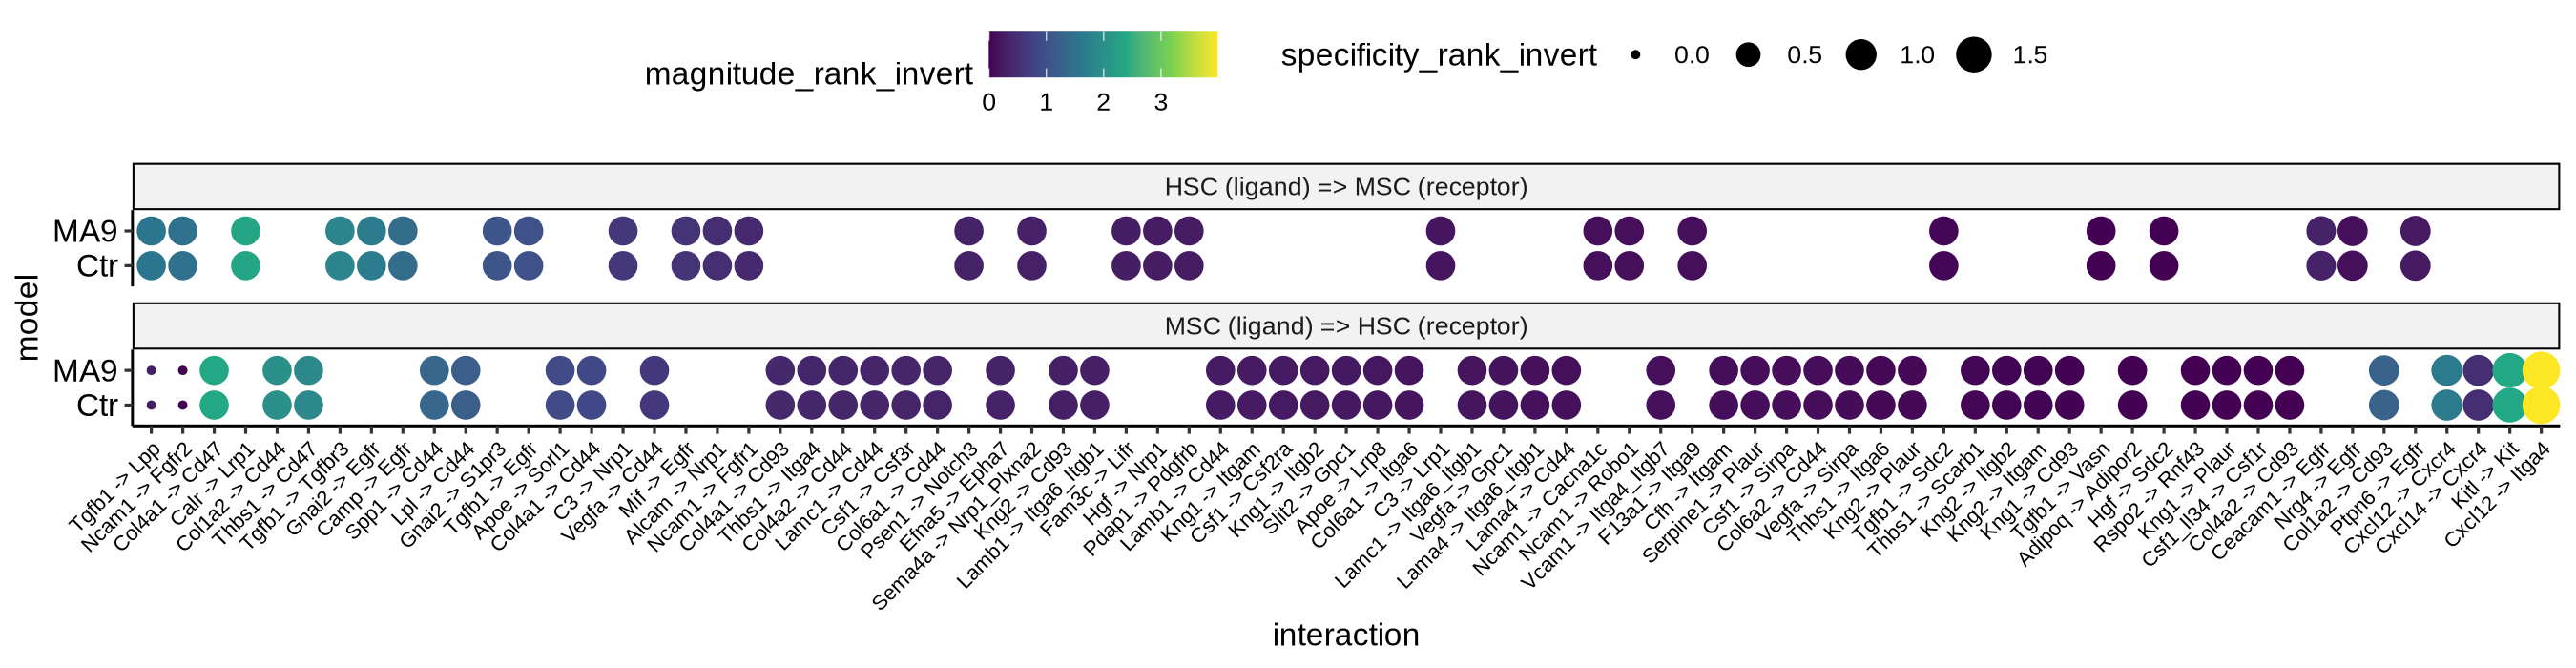

In [54]:
%%R -w 2700 -h 700 -r 200 -i ccc_dt -o plotdat
ccc_dt = as.data.table(ccc_dt)
ccc_dt[, st_ctype := paste0(source, '_', target)]
ccc_dt[, st_ctype2 := paste0(source, ' (ligand) => ', target, ' (receptor)')]
plotdat = ccc_dt[st_ctype %in% c('HSC_MSC', 'MSC_HSC'), ]
plotdat = plotdat %>% group_by(st_ctype) %>% slice_min(specificity_rank, n = 20)
plotdat = ccc_dt[interaction %in% plotdat$interaction & st_ctype %in% c('HSC_MSC', 'MSC_HSC'), ]
plotdat = as.data.table(plotdat)
plotdat[, source := paste0(source, '_', model)]
plotdat[, target := paste0(target, '_', model)]
plotdat = plotdat[order(specificity_rank_invert), ]
plotdat[, interaction := factor(interaction, levels = unique(plotdat$interaction))]
ggplot(plotdat, aes(interaction, model, size = specificity_rank_invert, color = magnitude_rank_invert)) + geom_point() + theme_pubr() +
scale_color_viridis_c() + theme_pubr() + theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1, size = 8)) + facet_wrap(~ st_ctype2, nrow = 4)


In [55]:
plotdat['source'].value_counts()

source
MSC_MA9    52
MSC_Ctr    52
HSC_MA9    27
HSC_Ctr    27
Name: count, dtype: int64

In [56]:
plotdat['target'].value_counts()


target
HSC_MA9    52
HSC_Ctr    52
MSC_MA9    27
MSC_Ctr    27
Name: count, dtype: int64

In [ ]:
oo = ccc_rna_ma9.copy()
oo.uns['plotdat'] = plotdat

my_plot = li.pl.tileplot(adata = oo,
                         fill='magnitude_rank',
                         label='specificity_rank',
                         label_fun=lambda x: f'{x:.2f}',
                         top_n=50,
                         orderby='specificity_rank',
                         orderby_ascending=True,
                         #source_labels=['CD34+', 'CD56+ NK', 'CD14+ Monocyte'],
                         #target_labels=['CD34+', 'CD56+ NK'],
                         uns_key='plotdat', # NOTE: default is 'liana_res'
                         source_title='Ligand',
                         target_title='Receptor',
                         figure_size=(8, 7)
                         )
my_plot


In [58]:
%%R
plotdat[interaction == 'Kitl -> Kit', ]


    source  target ligand_complex receptor_complex lr_means cellphone_pvals
1: MSC_MA9 HSC_MA9           Kitl              Kit 1.790025               0
2: MSC_Ctr HSC_Ctr           Kitl              Kit 1.790025               0
   expr_prod scaled_weight lr_logfc spec_weight  lrscore specificity_rank
1:  2.177122      1.279761 3.260441   0.9490942 0.901749       0.04003401
2:  2.177122      1.279761 3.260441   0.9490942 0.901749       0.04003401
   magnitude_rank interaction model specificity_rank_invert
1:    0.004135116 Kitl -> Kit   MA9                1.397571
2:    0.004135116 Kitl -> Kit   Ctr                1.397571
   magnitude_rank_invert st_ctype                      st_ctype2
1:              2.383512  MSC_HSC MSC (ligand) => HSC (receptor)
2:              2.383512  MSC_HSC MSC (ligand) => HSC (receptor)


In [60]:
%%R
ccc_dt[interaction == 'Lamb2 -> Rpsa', ]
ccc_dt[, oo := magnitude_rank * specificity_rank][order(-oo),][1:20, ]


    source target ligand_complex receptor_complex  lr_means cellphone_pvals
 1:    MSC    HSC         Adam10           Notch2 0.4052434               1
 2:    MSC    HSC         Adam10          Tspan14 0.3568928               1
 3:    HSC    MSC            Vcl            Itgb5 0.3202195               0
 4:    HSC    MSC         Sptan1            Ptpra 0.3941224               1
 5:    MSC    HSC             C3            Itgam 0.3374947               1
 6:    MSC    HSC         Adam17            Itgb1 0.4179491               1
 7:    MSC    HSC          Adam9            Itgav 0.3039378               0
 8:    HSC    MSC          Anxa1             Grm7 0.3202076               0
 9:    HSC    MSC           Apoe            Abca1 0.2991076               0
10:    HSC    MSC           Apoe             Lrp6 0.3109522               1
11:    HSC    MSC           Apoe             Sdc2 0.4451830               0
12:    HSC    MSC            App             Gpc1 0.4157750               1
13:    HSC  

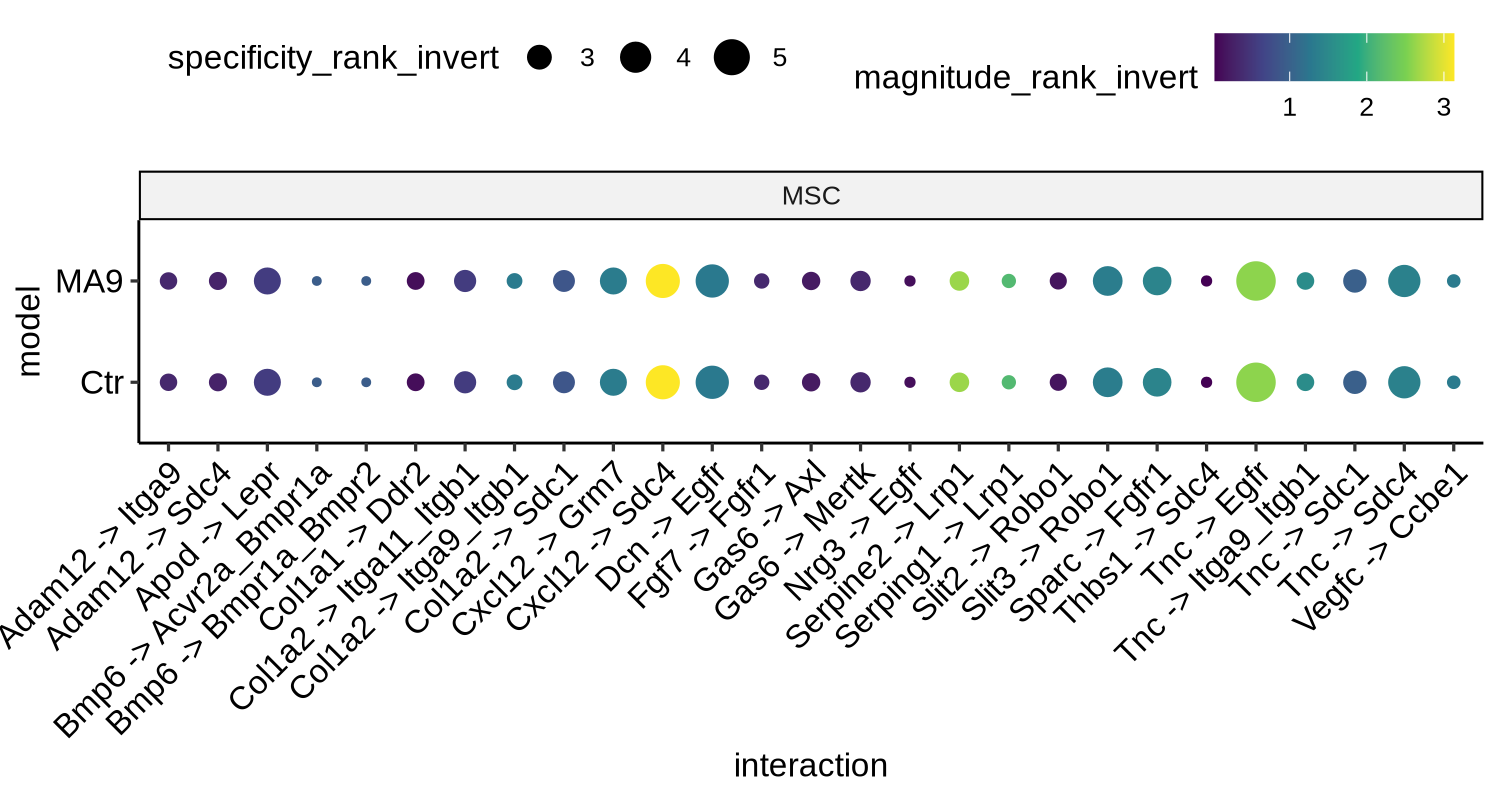

In [67]:
%%R -w 1500 -h 800 -r 200 -i ccc_dt
ccc_dt = as.data.table(ccc_dt) 
ccc_dt_sel = ccc_dt[specificity_rank < .01, ]
ggplot(ccc_dt_sel, aes(interaction, model, size = specificity_rank_invert, color = magnitude_rank_invert)) + geom_point() + theme_pubr() +
scale_color_viridis_c() + theme_pubr() + theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1)) + facet_wrap(~ source)



# analysis based on different time point

In [68]:
obs_dt = ccc_rna.obs
obs_dt['tag'] = obs_dt['sample_type'] + '__' + obs_dt['time_point'].astype(str) + "__" + obs_dt['cell_type'] 
ccc_rna.layers['ccc'] = ccc_rna.X

In [69]:
ccc_rna

AnnData object with n_obs × n_vars = 35262 × 17175
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'leiden', 'ngfr_predicted_labels', 'ngfr_over_clustering', 'ngfr_majority_voting', 'ngfr_conf_score', 'wk4_predicted_labels', 'wk4_over_clustering', 'wk4_majority_voting', 'wk4_conf_score', 'wk6_predicted_labels', 'wk6_over_clustering', 'wk6_majority_voting', 'wk6_conf_score', 'wk8_predicted_labels', 'wk8_over_clustering', 'wk8_majority_voting', 'wk8_conf_score', 'oldway_predicted_labels', 'oldway_over_clustering', 'oldway_majority_voting', 'oldway_conf_score', 'dp_predicted_labels', 'dp_over_clustering', 'dp_majority_voting', 'dp_conf_score', 'hspc_predicted_labels', 'hspc_over_clustering', 'hspc_majority_voting', 'hspc_conf_score', 'celltype_d1_predicted_labels', 'celltype_d1_over_clustering', 'celltype_d1_majority_voting', 'celltype_d1_conf_score', 'hNFGR_predicted_labels', 'hN

In [70]:
ccc_rna.layers['ccc'] = ccc_rna.X


In [71]:
li.mt.rank_aggregate(ccc_rna, resource_name = 'mouseconsensus', groupby='tag', expr_prop=0.1, verbose=True, layer = 'ccc', use_raw = False)


2024-05-22 08:38:02 - INFO - Using the `ccc` layer!
2024-05-22 08:38:03 - WARNING - 883 features of mat are empty, they will be removed.
2024-05-22 08:38:04 - WARNING - Converting `tag` to categorical!
2024-05-22 08:38:09 - INFO - Using resource `mouseconsensus`.
2024-05-22 08:38:10 - INFO - 0.38 of entities in the resource are missing from the data.


Generating ligand-receptor stats for 35262 samples and 904 features
Assuming that counts were `natural` log-normalized!
Running CellPhoneDB


100%|██████████| 1000/1000 [00:30<00:00, 32.45it/s]


Running Connectome
Running log2FC
Running NATMI
Running SingleCellSignalR


In [43]:
tmp_dt = ccc_rna.uns['liana_res'].copy()
#tmp_dt['specificity_rank_invert'] = -np.log10(tmp_dt['specificity_rank'] + np.finfo(float).eps)
#tmp_dt['magnitude_rank_invert']   = -np.log10(tmp_dt['magnitude_rank']   + np.finfo(float).eps)
#tmp_dt['interaction'] = tmp_dt['ligand_complex'] + ' -> ' + tmp_dt['receptor_complex']
#tmp_dt


In [44]:
%%R -i tmp_dt -o tmp_dt
# for exporting full datasets
tmp_dt = as.data.table(tmp_dt) 
tmp_dt[, specificity_rank_invert := -log10(specificity_rank)]
tmp_dt[, magnitude_rank_invert := -log10(magnitude_rank)]
tmp_dt[, interaction := paste(c(.SD$ligand_complex, .SD$receptor_complex), collapse = ' -> '), by = 1:nrow(tmp_dt)]

tmp_dt[, source_model := unlist(strsplit(source, '__'))[1], by = 1:nrow(tmp_dt)]
tmp_dt[, source_time  := unlist(strsplit(source, '__'))[2], by = 1:nrow(tmp_dt)]
tmp_dt[, source_ctype := unlist(strsplit(source, '__'))[3], by = 1:nrow(tmp_dt)]

tmp_dt[, target_model := unlist(strsplit(target, '__'))[1], by = 1:nrow(tmp_dt)]
tmp_dt[, target_time  := unlist(strsplit(target, '__'))[2], by = 1:nrow(tmp_dt)]
tmp_dt[, target_ctype := unlist(strsplit(target, '__'))[3], by = 1:nrow(tmp_dt)]

tmp_dt[, model := source_model] 
tmp_dt[, time_point := source_time] 
tmp_dt[, st_ctype := paste0(source, ' => ', target)]

fwrite(tmp_dt, file = 'data/ccc_all_time_point_ma9.tsv', sep = '\t')
head(tmp_dt)

tmp_dt = tmp_dt[source_model == target_model, ]
tmp_dt = tmp_dt[source_time == target_time, ]
tmp_dt = tmp_dt[source_ctype != target_ctype, ]
fwrite(tmp_dt, file = 'data/ccc_all_time_point_ma9_sel.tsv', sep = '\t')


In [45]:
tmp_dt

source         target ligand_complex receptor_complex  lr_means  \
1     model__8__MSC  model__8__HSC            App             Rpsa  2.695507   
2      Ctrl__6__MSC   Ctrl__6__HSC         Cxcl12            Itga4  2.802901   
3     model__6__MSC  model__6__HSC            App             Rpsa  2.648908   
4     model__6__MSC  model__6__HSC         Cxcl12            Itga4  2.700125   
5     model__4__MSC  model__4__HSC            App             Rpsa  2.466434   
...             ...            ...            ...              ...       ...   
1989   Ctrl__4__HSC   Ctrl__4__MSC            App             Gpc1  0.316884   
1990   Ctrl__4__HSC   Ctrl__4__MSC          Psen1           Notch1  0.294643   
1991   Ctrl__4__HSC   Ctrl__4__MSC          Psen1           Notch3  0.361306   
1992   Ctrl__4__HSC   Ctrl__4__MSC           Rtn4          Rtn4rl1  0.416315   
1993   Ctrl__4__HSC   Ctrl__4__MSC          Sirpa             Cd47  0.351000   

      cellphone_pvals  expr_prod  scaled_weight  lr_logfc  spec_weight  ...  \
1               0.000   5.926355       0.782489  1.194973     0.015989  ...   
2               0.000   5.485293       1.696326  2.268623     0.038397  ...   
3               0.000   6.282793       0.756612  0.790873     0.016951  ...   
4               0.000   4.329312       1.580814  1.878177     0.030305  ...   
5               0.000   5.729551       0.593249  0.614603     0.015458  ...   
...               ...        ...            ...       ...          ...  ...   
1989            1.000   0.079652      -0.310264 -0.541823     0.001838  ...   
1990            0.795   0.086781      -0.009841  0.075772     0.006970  ...   
1991            0.000   0.125287       0.387161  0.450503     0.008058  ...   
1992            0.000   0.123531       0.367664  0.312427     0.010677  ...   
1993            1.000   0.093609      -0.832256 -1.174844     0.002200  ...   

          interaction  source_model  source_time  source_ctype  target_model  \
1         App -> Rpsa         model            8           MSC         model   
2     Cxcl12 -> Itga4          Ctrl            6           MSC          Ctrl   
3         App -> Rpsa         model            6           MSC         model   
4     Cxcl12 -> Itga4         model            6           MSC         model   
5         App -> Rpsa         model            4           MSC         model   
...               ...           ...          ...           ...           ...   
1989      App -> Gpc1          Ctrl            4           HSC          Ctrl   
1990  Psen1 -> Notch1          Ctrl            4           HSC          Ctrl   
1991  Psen1 -> Notch3          Ctrl            4           HSC          Ctrl   
1992  Rtn4 -> Rtn4rl1          Ctrl            4           HSC          Ctrl   
1993    Sirpa -> Cd47          Ctrl            4           HSC          Ctrl   

     target_time target_ctype  model time_point  \
1              8          HSC  model          8   
2              6          HSC   Ctrl          6   
3              6          HSC  model          6   
4              6          HSC  model          6   
5              4          HSC  model          4   
...          ...          ...    ...        ...   
1989           4          MSC   Ctrl          4   
1990           4          MSC   Ctrl          4   
1991           4          MSC   Ctrl          4   
1992           4          MSC   Ctrl          4   
1993           4          MSC   Ctrl          4   

                            st_ctype  
1     model__8__MSC => model__8__HSC  
2       Ctrl__6__MSC => Ctrl__6__HSC  
3     model__6__MSC => model__6__HSC  
4     model__6__MSC => model__6__HSC  
5     model__4__MSC => model__4__HSC  
...                              ...  
1989    Ctrl__4__HSC => Ctrl__4__MSC  
1990    Ctrl__4__HSC => Ctrl__4__MSC  
1991    Ctrl__4__HSC => Ctrl__4__MSC  
1992    Ctrl__4__HSC => Ctrl__4__MSC  
1993    Ctrl__4__HSC => Ctrl__4__MSC  

[1993 rows x 25 columns]

In [40]:
%R head(tmp_dt)

source         target ligand_complex receptor_complex  lr_means  \
1  model__8__MSC  model__8__HSC            App             Rpsa  2.695507   
2   Ctrl__6__MSC   Ctrl__6__HSC         Cxcl12            Itga4  2.802901   
3  model__6__MSC  model__6__HSC            App             Rpsa  2.648908   
4  model__6__MSC  model__6__HSC         Cxcl12            Itga4  2.700125   
5  model__4__MSC  model__4__HSC            App             Rpsa  2.466434   
6   Ctrl__6__MSC   Ctrl__6__HSC            App             Rpsa  2.379135   

   cellphone_pvals  expr_prod  scaled_weight  lr_logfc  spec_weight  ...  \
1              0.0   5.926355       0.782489  1.194973     0.015989  ...   
2              0.0   5.485293       1.696326  2.268623     0.038397  ...   
3              0.0   6.282793       0.756612  0.790873     0.016951  ...   
4              0.0   4.329312       1.580814  1.878177     0.030305  ...   
5              0.0   5.729551       0.593249  0.614603     0.015458  ...   
6              0.0   5.563969       0.525876  0.419314     0.015011  ...   

       interaction  source_model  source_time  source_ctype  target_model  \
1      App -> Rpsa         model            8           MSC         model   
2  Cxcl12 -> Itga4          Ctrl            6           MSC          Ctrl   
3      App -> Rpsa         model            6           MSC         model   
4  Cxcl12 -> Itga4         model            6           MSC         model   
5      App -> Rpsa         model            4           MSC         model   
6      App -> Rpsa          Ctrl            6           MSC          Ctrl   

  target_time target_ctype  model time_point                        st_ctype  
1           8          HSC  model          8  model__8__MSC => model__8__HSC  
2           6          HSC   Ctrl          6    Ctrl__6__MSC => Ctrl__6__HSC  
3           6          HSC  model          6  model__6__MSC => model__6__HSC  
4           6          HSC  model          6  model__6__MSC => model__6__HSC  
5           4          HSC  model          4  model__4__MSC => model__4__HSC  
6           6          HSC   Ctrl          6    Ctrl__6__MSC => Ctrl__6__HSC  

[6 rows x 25 columns]

In [ ]:
tmp_dt = ccc_rna.uns['liana_res'].copy()


In [28]:
%%R -i tmp_dt
tmp_dt = as.data.table(tmp_dt) 
tmp_dt[, specificity_rank_invert := -log10(specificity_rank)]
tmp_dt[, magnitude_rank_invert := -log10(magnitude_rank)]
tmp_dt[, interaction := paste(c(.SD$ligand_complex, .SD$receptor_complex), collapse = ' -> '), by = 1:nrow(tmp_dt)]

tmp_dt[, source_model := unlist(strsplit(source, '__'))[1], by = 1:nrow(tmp_dt)]
tmp_dt[, source_time  := unlist(strsplit(source, '__'))[2], by = 1:nrow(tmp_dt)]
tmp_dt[, source_ctype := unlist(strsplit(source, '__'))[3], by = 1:nrow(tmp_dt)]

tmp_dt[, target_model := unlist(strsplit(target, '__'))[1], by = 1:nrow(tmp_dt)]
tmp_dt[, target_time  := unlist(strsplit(target, '__'))[2], by = 1:nrow(tmp_dt)]
tmp_dt[, target_ctype := unlist(strsplit(target, '__'))[3], by = 1:nrow(tmp_dt)]

tmp_dt = tmp_dt[source_model == target_model, ]
tmp_dt = tmp_dt[source_time == target_time, ]
tmp_dt = tmp_dt[source_ctype != target_ctype, ]

tmp_dt[, model := source_model] 
tmp_dt[, time_point := source_time] 
tmp_dt[, st_ctype := paste0(source, ' => ', target)]
head(tmp_dt)

int_sel = tmp_dt[specificity_rank < 0.1 & grepl('MSC', source_ctype), interaction]
plotdat = tmp_dt[interaction %in% int_sel, ]
#plotdat = dcast(interaction ~ st_ctype, data = plotdat, value.var = 'specificity_rank_invert', fill = 0.0001)
plotdat = dcast(interaction ~ st_ctype, data = plotdat, value.var = 'magnitude_rank_invert', fill = 0.0001)
plotdat = setDF(plotdat[, 2:ncol(plotdat)], rownames = plotdat$interaction)
plotdat = scale_fun(plotdat) 
plotdat[plotdat > 2] = 2
plotdat[plotdat < -2] = -2

head(plotdat)

                  Ctrl__4__MSC => Ctrl__4__HSC Ctrl__6__MSC => Ctrl__6__HSC
Adipoq -> Adipor1                    0.9641173                   -0.7981635
Adipoq -> Adipor2                   -0.7399882                   -0.7399882
Adm -> Ramp1                        -0.4082483                   -0.4082483
Adm -> Tshr                          0.4082483                    0.4082483
Apoe -> Lrp8                        -0.9346624                    0.1734043
Apoe -> Sorl1                       -0.9609359                   -0.6910974
                  Ctrl__8__MSC => Ctrl__8__HSC model__4__MSC => model__4__HSC
Adipoq -> Adipor1                   -0.7974255                     1.46931482
Adipoq -> Adipor2                   -0.5908555                    -0.06504195
Adm -> Ramp1                        -0.4082483                    -0.40824829
Adm -> Tshr                          0.4082483                     0.40824829
Apoe -> Lrp8                        -0.9340066                    -0.36061418


In [74]:
%%R
dsn = data.table(sample_name = colnames(plotdat)) 
dsn[, source := sub('(.*) => (.*)', '\\1', sample_name)]
dsn[, target := sub('(.*) => (.*)', '\\2', sample_name)]
dsn[, ma9_ctrl := sub('(.*)__(.*)__(.*)', '\\1',source)]
dsn[, time_point := sub('(.*)__(.*)__(.*)', '\\2',source)]
dsn[, source_ctype := sub('(.*)__(.*)__(.*)', '\\3',source)]
dsn[, target_ctype := sub('(.*)__(.*)__(.*)', '\\3',target)]
dsn[, st_type := paste0(source_ctype, '=>', target_ctype)]
dsn[, tag := paste0(st_type, '_', time_point, '_', ma9_ctrl)]
dsn = dsn[grep('MSC', source), ]
dsn = dsn[order(tag), ]
dsn_df = setDF(dsn[, 2:ncol(dsn)], rownames = dsn$sample_name)
head(dsn_df) 

                                      source        target ma9_ctrl time_point
Ctrl__4__MSC => Ctrl__4__HSC    Ctrl__4__MSC  Ctrl__4__HSC     Ctrl          4
model__4__MSC => model__4__HSC model__4__MSC model__4__HSC    model          4
Ctrl__6__MSC => Ctrl__6__HSC    Ctrl__6__MSC  Ctrl__6__HSC     Ctrl          6
model__6__MSC => model__6__HSC model__6__MSC model__6__HSC    model          6
Ctrl__8__MSC => Ctrl__8__HSC    Ctrl__8__MSC  Ctrl__8__HSC     Ctrl          8
model__8__MSC => model__8__HSC model__8__MSC model__8__HSC    model          8
                               source_ctype target_ctype  st_type
Ctrl__4__MSC => Ctrl__4__HSC            MSC          HSC MSC=>HSC
model__4__MSC => model__4__HSC          MSC          HSC MSC=>HSC
Ctrl__6__MSC => Ctrl__6__HSC            MSC          HSC MSC=>HSC
model__6__MSC => model__6__HSC          MSC          HSC MSC=>HSC
Ctrl__8__MSC => Ctrl__8__HSC            MSC          HSC MSC=>HSC
model__8__MSC => model__8__HSC          MSC        

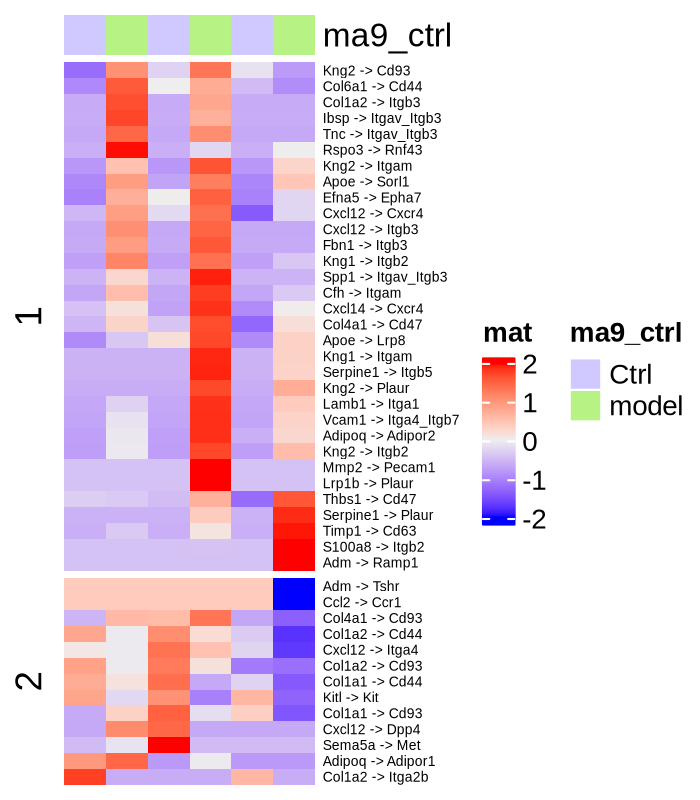

In [75]:
%%R -w 700 -h 800 -r 200
column_ha = HeatmapAnnotation(df = dsn_df[, 'ma9_ctrl', drop = F])
#column_ra = rowAnnotation(df = dsn_df)
Heatmap(plotdat[, dsn$sample_name], name = "mat", show_column_names = F, show_row_names = T, show_column_dend = F, cluster_columns  = F, cluster_rows = T, row_km = 2,  
        show_row_dend = F, row_names_gp = grid::gpar(fontsize = 5), top_annotation = column_ha, column_split = dsn_df$st_ctype) #, left_annotation = column_ra, # column_split = factor(dsn_all_df$cell_type, levels = cell_types))  


In [83]:
%%R
options(width = 200)
head(tmp_dt)


          source        target ligand_complex receptor_complex lr_means cellphone_pvals expr_prod scaled_weight  lr_logfc spec_weight   lrscore specificity_rank magnitude_rank specificity_rank_invert
1: model__8__MSC model__8__HSC            App             Rpsa 2.695507               0  5.926355     0.7824890 1.1949725  0.01598921 0.9380522      0.196369637   7.767043e-06               0.7069257
2:  Ctrl__6__MSC  Ctrl__6__HSC         Cxcl12            Itga4 2.802901               0  5.485293     1.6963260 2.2686234  0.03839717 0.9357667      0.006897883   1.033975e-05               2.1612841
3: model__6__MSC model__6__HSC            App             Rpsa 2.648908               0  6.282793     0.7566124 0.7908728  0.01695087 0.9397276      0.150228041   1.407187e-05               0.8232490
4: model__6__MSC model__6__HSC         Cxcl12            Itga4 2.700125               0  4.329312     1.5808136 1.8781773  0.03030528 0.9282767      0.052143638   7.528512e-05               1.2827987


In [78]:
%%R

#plotdat = plotdat[time_point == 4, ] 
sel_list = lapply(c(4,6,8), function(ii){
    sel = tmp_dt[time_point == ii, ] %>% slice_min(specificity_rank, n = 20)
    tmp_dt[interaction %in% sel$interaction & time_point == ii, ]
})
sel_dt = rbindlist(sel_list)
head(sel_dt)


          source        target ligand_complex receptor_complex lr_means
1:  Ctrl__4__MSC  Ctrl__4__HSC         Cxcl12            Itga4 2.334449
2: model__4__MSC model__4__HSC         Cxcl12            Itga4 2.422172
3:  Ctrl__4__MSC  Ctrl__4__HSC           Kitl              Kit 2.040661
4: model__4__HSC model__4__MSC           Camp             Egfr 1.904123
5: model__4__MSC model__4__HSC         Cxcl12            Cxcr4 2.294936
6: model__4__MSC model__4__HSC           Kitl              Kit 1.873179
   cellphone_pvals expr_prod scaled_weight lr_logfc spec_weight   lrscore
1:               0  4.324028      1.339158 1.672566  0.03026829 0.9282360
2:               0  3.505854      1.355924 1.688786  0.02454105 0.9209282
3:               0  3.346514      1.550609 2.054017  0.03993800 0.9192179
4:               0  3.624826      1.672613 2.398195  0.05134316 0.9221348
5:               0  2.498463      1.561666 1.980847  0.04118086 0.9076813
6:               0  1.912936      1.352767 1.703007 

# run liana using the MSC wk8 specific cluster

In [112]:
obs_df = pd.read_csv('data/nb_niche_snapATAC2_May8_msc_rna_2_obs.csv')
obs_df.rename(columns = {'Unnamed: 0': 'index'}, inplace = True)
obs_df.set_index('index')
obs_df = obs_df[obs_df['sampleID'].isin(['M4'])]

# MA9 model: cluster 2 msc @ wk8
tmp = obs_df[obs_df['leiden'].isin([2])]
msc_cl2 = ccc_rna[tmp['index']]
msc_cl2.obs['kluster'] = 'MA9_MSC_CL2'

# MA9 model: cluster 3 msc @ wk8
tmp = obs_df[obs_df['leiden'].isin([3])]
msc_cl3 = ccc_rna[tmp['index']]
msc_cl3.obs['kluster'] = 'MA9_MSC_CL3'

# MA9 model: HSC wk8
hsc_wk8 = ccc_rna[ccc_rna.obs['sampleID'].isin(['H4'])]
hsc_wk8.obs['kluster'] = 'MA9_HSC'

# Ctrl HSC wk8
ctrl_hsc = ccc_rna[ccc_rna.obs['sample_name'].isin(['ctrl_h8w'])]
ctrl_hsc.obs['kluster'] = 'Ctr_HSC'

ctrl_msc = ccc_rna[ccc_rna.obs['sample_name'].isin(['ctrl_m8w'])]
ctrl_msc.obs['kluster'] = 'Ctr_MSC'


oo = ad.concat(list([msc_cl2, msc_cl3, hsc_wk8, ctrl_hsc, ctrl_msc]))

In [113]:
oo

AnnData object with n_obs × n_vars = 12958 × 17175
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'leiden', 'ngfr_predicted_labels', 'ngfr_over_clustering', 'ngfr_majority_voting', 'ngfr_conf_score', 'wk4_predicted_labels', 'wk4_over_clustering', 'wk4_majority_voting', 'wk4_conf_score', 'wk6_predicted_labels', 'wk6_over_clustering', 'wk6_majority_voting', 'wk6_conf_score', 'wk8_predicted_labels', 'wk8_over_clustering', 'wk8_majority_voting', 'wk8_conf_score', 'oldway_predicted_labels', 'oldway_over_clustering', 'oldway_majority_voting', 'oldway_conf_score', 'dp_predicted_labels', 'dp_over_clustering', 'dp_majority_voting', 'dp_conf_score', 'hspc_predicted_labels', 'hspc_over_clustering', 'hspc_majority_voting', 'hspc_conf_score', 'celltype_d1_predicted_labels', 'celltype_d1_over_clustering', 'celltype_d1_majority_voting', 'celltype_d1_conf_score', 'hNFGR_predicted_labels', 'hN

In [114]:
oo.layers['ccc'] = oo.layers['counts'].copy()
li.mt.rank_aggregate(oo, resource_name = 'mouseconsensus', groupby='kluster', expr_prop=0.1, verbose=True, layer = 'ccc', use_raw = False)


2024-05-22 09:58:20 - INFO - Using the `ccc` layer!
2024-05-22 09:58:20 - WARNING - 1459 features of mat are empty, they will be removed.
2024-05-22 09:58:20 - WARNING - Converting `kluster` to categorical!
2024-05-22 09:58:22 - INFO - Using resource `mouseconsensus`.
2024-05-22 09:58:23 - INFO - 0.41 of entities in the resource are missing from the data.


Generating ligand-receptor stats for 12958 samples and 850 features
Assuming that counts were `natural` log-normalized!
Running CellPhoneDB


100%|██████████| 1000/1000 [00:10<00:00, 91.56it/s]


Running Connectome
Running log2FC
Running NATMI
Running SingleCellSignalR


In [125]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("<style>.output_result { max-width:100% !important; }</style>")) 

In [127]:
tmp_dt = oo.uns['liana_res'].copy()


In [143]:
%%R -w 700 -h 800 -r 200 -i tmp_dt
tmp_dt = as.data.table(tmp_dt) 
tmp_dt[, specificity_rank_invert := -log10(specificity_rank)]
tmp_dt[, magnitude_rank_invert := -log10(magnitude_rank)]
tmp_dt[, interaction := paste(c(.SD$ligand_complex, .SD$receptor_complex), collapse = ' -> '), by = 1:nrow(tmp_dt)]
tmp_dt[, st_type := paste0(source, '__', target)]
st_type_sel = c('MA9_MSC_CL2__MA9_HSC', 'MA9_MSC_CL3__MA9_HSC', 'Ctr_MSC__Ctr_HSC')
plotdat = tmp_dt[st_type %in% st_type_sel, ]
plotdat = plotdat[specificity_rank < .4, ]
plotdat = dcast(interaction ~ st_type, data = plotdat, value.var = 'magnitude_rank_invert')
print(plotdat[grep('S100a6', interaction), ])


Empty data.table (0 rows and 4 cols): interaction,Ctr_MSC__Ctr_HSC,MA9_MSC_CL2__MA9_HSC,MA9_MSC_CL3__MA9_HSC


Empty data.table (0 rows and 4 cols): interaction,Ctr_MSC__Ctr_HSC,MA9_MSC_CL2__MA9_HSC,MA9_MSC_CL3__MA9_HSC
                 Ctr_MSC__Ctr_HSC MA9_MSC_CL2__MA9_HSC MA9_MSC_CL3__MA9_HSC
Adm -> Ramp1           -0.5773503           -0.5773503            1.1547005
Adm -> Tshr            -0.5773503           -0.5773503            1.1547005
Apoe -> Sorl1          -1.1415987            0.4205853            0.7210135
Col1a2 -> Cd93         -0.5773503           -0.5773503            1.1547005
Col1a2 -> Itga2b        1.1547005           -0.5773503           -0.5773503
Cxcl12 -> Cxcr4        -0.5773503           -0.5773503            1.1547005


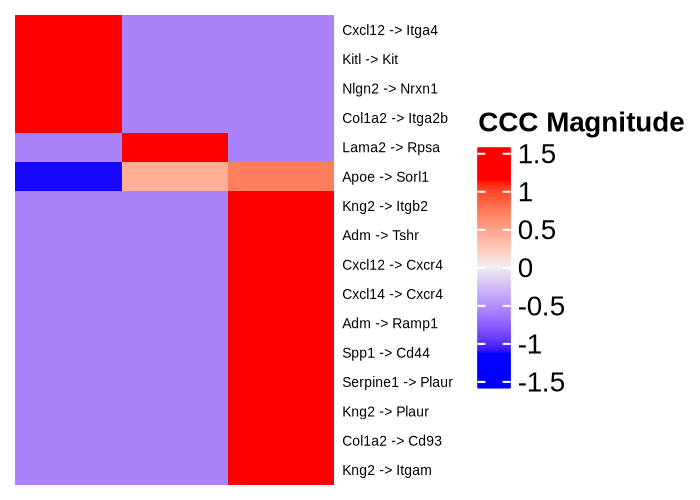

In [150]:
%%R -w 700 -h 500 -r 200 -i tmp_dt
tmp_dt = as.data.table(tmp_dt) 
tmp_dt[, specificity_rank_invert := -log10(specificity_rank)]
tmp_dt[, magnitude_rank_invert := -log10(magnitude_rank)]
tmp_dt[, interaction := paste(c(.SD$ligand_complex, .SD$receptor_complex), collapse = ' -> '), by = 1:nrow(tmp_dt)]
tmp_dt[, st_type := paste0(source, '__', target)]
st_type_sel = c('MA9_MSC_CL2__MA9_HSC', 'MA9_MSC_CL3__MA9_HSC', 'Ctr_MSC__Ctr_HSC')
plotdat = tmp_dt[st_type %in% st_type_sel, ]
plotdat = plotdat[specificity_rank < .1, ]
plotdat = dcast(interaction ~ st_type, data = plotdat, value.var = 'magnitude_rank_invert')
print(plotdat[grep('S100a6', interaction), ])
plotdat = setDF(plotdat[, 2:ncol(plotdat)], rownames = plotdat$interaction)
plotdat = as.matrix(plotdat)
plotdat[is.na(plotdat)] = 0
plotdat = scale_fun(plotdat) 
plotdat[plotdat > 2] = 2
plotdat[plotdat < -2] = -2

print(head(plotdat))
Heatmap(plotdat, name = "CCC Magnitude", show_column_names = F, show_row_names = T, show_column_dend = F, cluster_columns  = F, cluster_rows = T, #row_km = 2,  
        show_row_dend = F, row_names_gp = grid::gpar(fontsize = 5))#, top_annotation = column_ha, column_split = dsn_df$st_ctype) #, left_annotation = column_ra, # column_split = factor(dsn_all_df$cell_type, levels = cell_types))  


In [ ]:
%%R -w 700 -h 800 -r 200 -i tmp_dt
tmp_dt = as.data.table(tmp_dt) 
tmp_dt[, specificity_rank_invert := -log10(specificity_rank)]
tmp_dt[, magnitude_rank_invert := -log10(magnitude_rank)]
tmp_dt[, interaction := paste(c(.SD$ligand_complex, .SD$receptor_complex), collapse = ' -> '), by = 1:nrow(tmp_dt)]
tmp_dt[, st_type := paste0(source, '__', target)]
st_type_sel = c('MA9_HSC_CL2__MA9_MSC', 'MA9_HSC_CL3__MA9_MSC', 'Ctr_HSC__Ctr_MSC')
plotdat = tmp_dt[st_type %in% st_type_sel, ]
plotdat = plotdat[specificity_rank < .1, ]
plotdat = dcast(interaction ~ st_type, data = plotdat, value.var = 'magnitude_rank_invert')
plotdat = setDF(plotdat[, 2:ncol(plotdat)], rownames = plotdat$interaction)
plotdat = as.matrix(plotdat)
plotdat[is.na(plotdat)] = 0
plotdat = scale_fun(plotdat) 
plotdat[plotdat > 2] = 2
plotdat[plotdat < -2] = -2

print(head(plotdat))
Heatmap(plotdat, name = "CCC Magnitude", show_column_names = F, show_row_names = T, show_column_dend = F, cluster_columns  = F, cluster_rows = T, row_km = 2,  
        show_row_dend = F, row_names_gp = grid::gpar(fontsize = 5))#, top_annotation = column_ha, column_split = dsn_df$st_ctype) #, left_annotation = column_ra, # column_split = factor(dsn_all_df$cell_type, levels = cell_types))  


In [138]:
%%R
head(plotdat)

                 Ctr_MSC__Ctr_HSC MA9_MSC_CL2__MA9_HSC MA9_MSC_CL3__MA9_HSC
Adm -> Ramp1           -0.5773503           -0.5773503            1.1547005
Adm -> Tshr            -0.5773503           -0.5773503            1.1547005
Apoe -> Sorl1          -1.1415987            0.4205853            0.7210135
Col1a2 -> Cd93         -0.5773503           -0.5773503            1.1547005
Col1a2 -> Itga2b        1.1547005           -0.5773503           -0.5773503
Cxcl12 -> Cxcr4        -0.5773503           -0.5773503            1.1547005


In [ ]:
%%R -w 700 -h 800 -r 200 -i tmp_dt
tmp_dt = as.data.table(tmp_dt) 
tmp_dt[, specificity_rank_invert := -log10(specificity_rank)]
tmp_dt[, magnitude_rank_invert := -log10(magnitude_rank)]
tmp_dt[, interaction := paste(c(.SD$ligand_complex, .SD$receptor_complex), collapse = ' -> '), by = 1:nrow(tmp_dt)]

tmp_dt[, source_model := unlist(strsplit(source, '__'))[1], by = 1:nrow(tmp_dt)]
tmp_dt[, source_time  := unlist(strsplit(source, '__'))[2], by = 1:nrow(tmp_dt)]
tmp_dt[, source_ctype := unlist(strsplit(source, '__'))[3], by = 1:nrow(tmp_dt)]

tmp_dt[, target_model := unlist(strsplit(target, '__'))[1], by = 1:nrow(tmp_dt)]
tmp_dt[, target_time  := unlist(strsplit(target, '__'))[2], by = 1:nrow(tmp_dt)]
tmp_dt[, target_ctype := unlist(strsplit(target, '__'))[3], by = 1:nrow(tmp_dt)]

tmp_dt = tmp_dt[source_model == target_model, ]
tmp_dt = tmp_dt[source_time == target_time, ]
tmp_dt = tmp_dt[source_ctype != target_ctype, ]

tmp_dt[, model := source_model] 
tmp_dt[, time_point := source_time] 
tmp_dt[, st_ctype := paste0(source, ' => ', target)]
head(tmp_dt)

int_sel = tmp_dt[specificity_rank < 0.1 & grepl('MSC', source_ctype), interaction]
plotdat = tmp_dt[interaction %in% int_sel, ]
#plotdat = dcast(interaction ~ st_ctype, data = plotdat, value.var = 'specificity_rank_invert', fill = 0.0001)
plotdat = dcast(interaction ~ st_ctype, data = plotdat, value.var = 'magnitude_rank_invert', fill = 0.0001)
plotdat = setDF(plotdat[, 2:ncol(plotdat)], rownames = plotdat$interaction)
plotdat = scale_fun(plotdat) 
plotdat[plotdat > 2] = 2
plotdat[plotdat < -2] = -2

head(plotdat)
%%R
dsn = data.table(sample_name = colnames(plotdat)) 
dsn[, source := sub('(.*) => (.*)', '\\1', sample_name)]
dsn[, target := sub('(.*) => (.*)', '\\2', sample_name)]
dsn[, ma9_ctrl := sub('(.*)__(.*)__(.*)', '\\1',source)]
dsn[, time_point := sub('(.*)__(.*)__(.*)', '\\2',source)]
dsn[, source_ctype := sub('(.*)__(.*)__(.*)', '\\3',source)]
dsn[, target_ctype := sub('(.*)__(.*)__(.*)', '\\3',target)]
dsn[, st_type := paste0(source_ctype, '=>', target_ctype)]
dsn[, tag := paste0(st_type, '_', time_point, '_', ma9_ctrl)]
dsn = dsn[grep('MSC', source), ]
dsn = dsn[order(tag), ]
dsn_df = setDF(dsn[, 2:ncol(dsn)], rownames = dsn$sample_name)
head(dsn_df) 
column_ha = HeatmapAnnotation(df = dsn_df[, 'ma9_ctrl', drop = F])
#column_ra = rowAnnotation(df = dsn_df)
Heatmap(plotdat[, dsn$sample_name], name = "mat", show_column_names = F, show_row_names = T, show_column_dend = F, cluster_columns  = F, cluster_rows = T, row_km = 2,  
        show_row_dend = F, row_names_gp = grid::gpar(fontsize = 5), top_annotation = column_ha, column_split = dsn_df$st_ctype) #, left_annotation = column_ra, # column_split = factor(dsn_all_df$cell_type, levels = cell_types))  


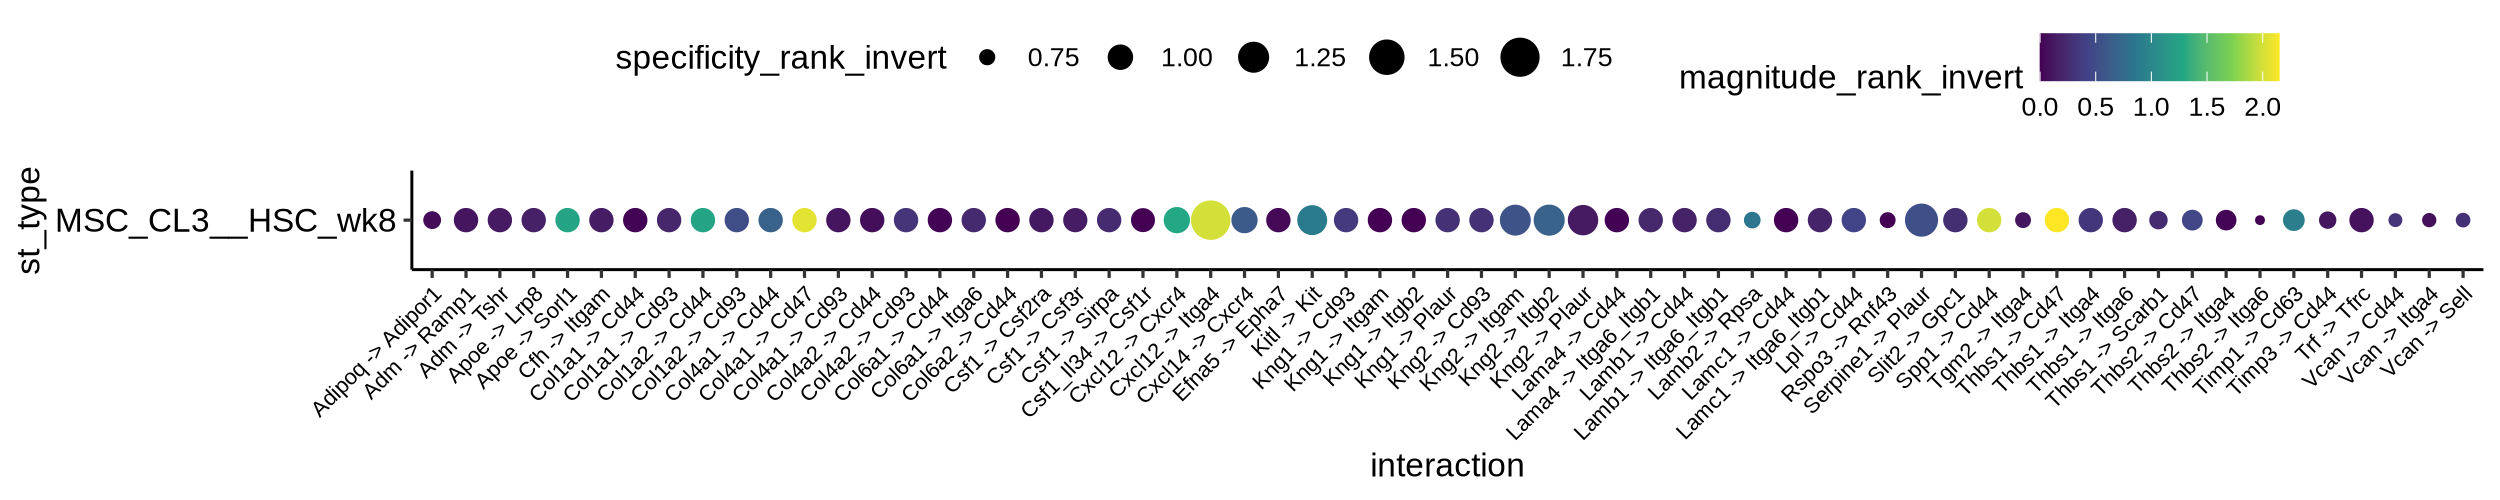

In [885]:
%%R -w 2500 -h 500 -r 200 -i tmp_dt
tmp_dt = as.data.table(tmp_dt) 
tmp_dt[, specificity_rank_invert := -log10(specificity_rank)]
tmp_dt[, magnitude_rank_invert := -log10(magnitude_rank)]
tmp_dt[, interaction := paste(c(.SD$ligand_complex, .SD$receptor_complex), collapse = ' -> '), by = 1:nrow(tmp_dt)]
tmp_dt[,  st_type := paste0(source, '__', target)]
tmp_dt = tmp_dt[source != target, ]
tmp_dt
int_sel = tmp_dt[specificity_rank < 0.2 & grepl('MSC', source), interaction]
plotdat = tmp_dt[interaction %in% int_sel, ]
plotdat
ggplot(plotdat, aes(interaction, st_type, size = specificity_rank_invert, color = magnitude_rank_invert)) + geom_point() + theme_pubr() +
scale_color_viridis_c() + theme_pubr() + theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1, size = 8))


# export data

In [ ]:
ccc_rna.write_h5ad('data/ccc_rna_May22.h5ad')
ccc_rna_ma9.write_h5ad('data/ccc_rna_ma9_May22.h5ad')
ccc_rna_ctr.write_h5ad('data/ccc_rna_ctrl_May22.h5ad')
oo.write_h5ad('data/ccc_rna_wk8_subclusterMSC_May22.h5ad')


In [26]:
ccc_rna = sc.read_h5ad('data/ccc_rna_May22.h5ad')
ccc_rna_ma9 = sc.read_h5ad('data/ccc_rna_ma9_May22.h5ad')
ccc_rna_ctr = sc.read_h5ad('data/ccc_rna_ctrl_May22.h5ad')
oo = sc.read_h5ad('data/ccc_rna_wk8_subclusterMSC_May22.h5ad')


# backup code

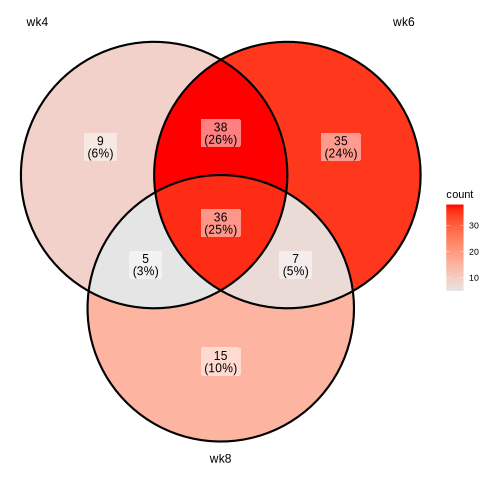

In [453]:
%%R
library(ggVennDiagram)
vv = list(wk4 = tmp_dt[time_point == 4 & source_ctype == 'MSC' & target_ctype == 'HSC' & specificity_rank < .2, interaction], 
          wk6 = tmp_dt[time_point == 6 & source_ctype == 'MSC' & target_ctype == 'HSC' & specificity_rank < .2, interaction], 
          wk8 = tmp_dt[time_point == 8 & source_ctype == 'MSC' & target_ctype == 'HSC' & specificity_rank < .2, interaction])
ggVennDiagram(vv) + scale_fill_gradient(low="grey90",high = "red")


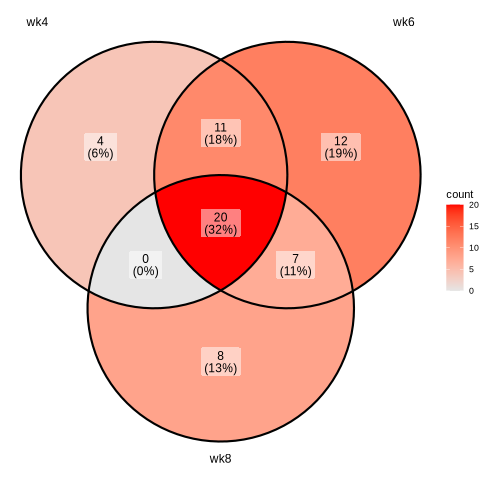

In [454]:
%%R
library(ggVennDiagram)
vv = list(wk4 = tmp_dt[time_point == 4 & source_ctype == 'HSC' & target_ctype == 'MSC' & specificity_rank < .2, interaction], 
          wk6 = tmp_dt[time_point == 6 & source_ctype == 'HSC' & target_ctype == 'MSC' & specificity_rank < .2, interaction], 
          wk8 = tmp_dt[time_point == 8 & source_ctype == 'HSC' & target_ctype == 'MSC' & specificity_rank < .2, interaction])
ggVennDiagram(vv) + scale_fill_gradient(low="grey90",high = "red")
